# RNN--are sequence models...not limited to nlp
https://karpathy.github.io/2015/05/21/rnn-effectiveness/

https://medium.com/@thisislong/building-a-recurrent-neural-network-from-scratch-ba9b27a42856

# Recurrent Neural Network (RNN) Formulas
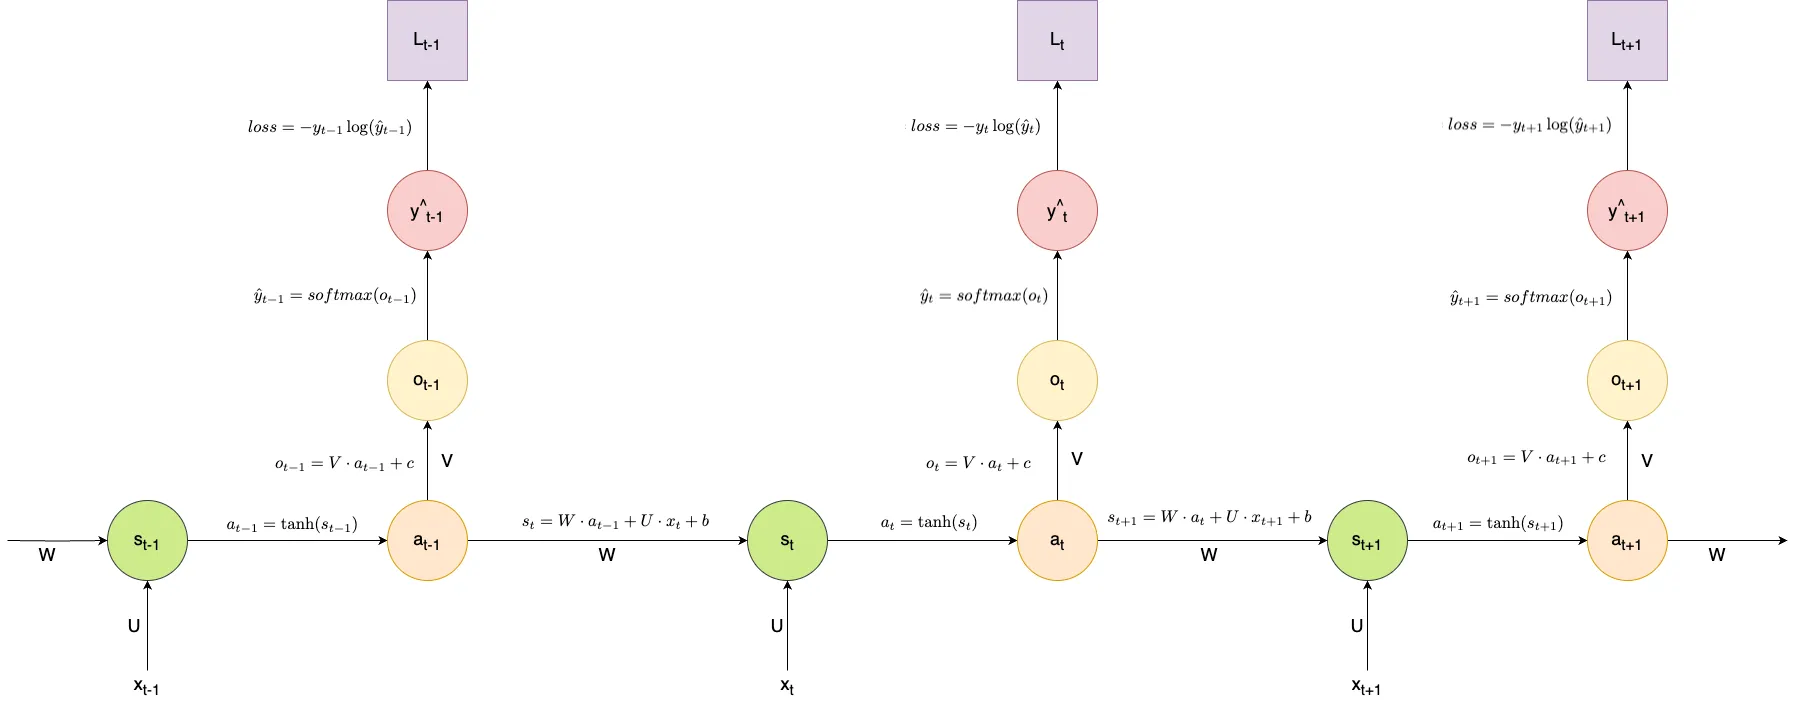

### Input Transformation
1. At each time step $t$, the input vector $x_t$ is transformed by weights:

   $$
   s_t = W \cdot a_{t-1} + U \cdot x_t + b
   $$
   where:
   - $W$ and $U$ are weight matrices for the hidden state and input.
   - $b$ is the bias term.

### Activation Function
2. The hidden state $s_t$ is passed through an activation function (e.g., $\tanh$) to obtain $a_t$:
   $$
   a_t = \tanh(s_t)
   $$

### Output Prediction
3. Output is calculated using weights $V$:
   $$
   o_t = V \cdot a_t + c
   $$
   where $c$ is the output bias.

4. Predicted output $\hat{y}_t$ is generated using the softmax activation function:
   $$
   \hat{y}_t = \text{softmax}(o_t)
   $$

### Loss Calculation
5. Cross-entropy loss is used for each time step:
   $$
   L_t = -y_t \cdot \log(\hat{y}_t)
   $$

### Backpropagation Through Time (BPTT)
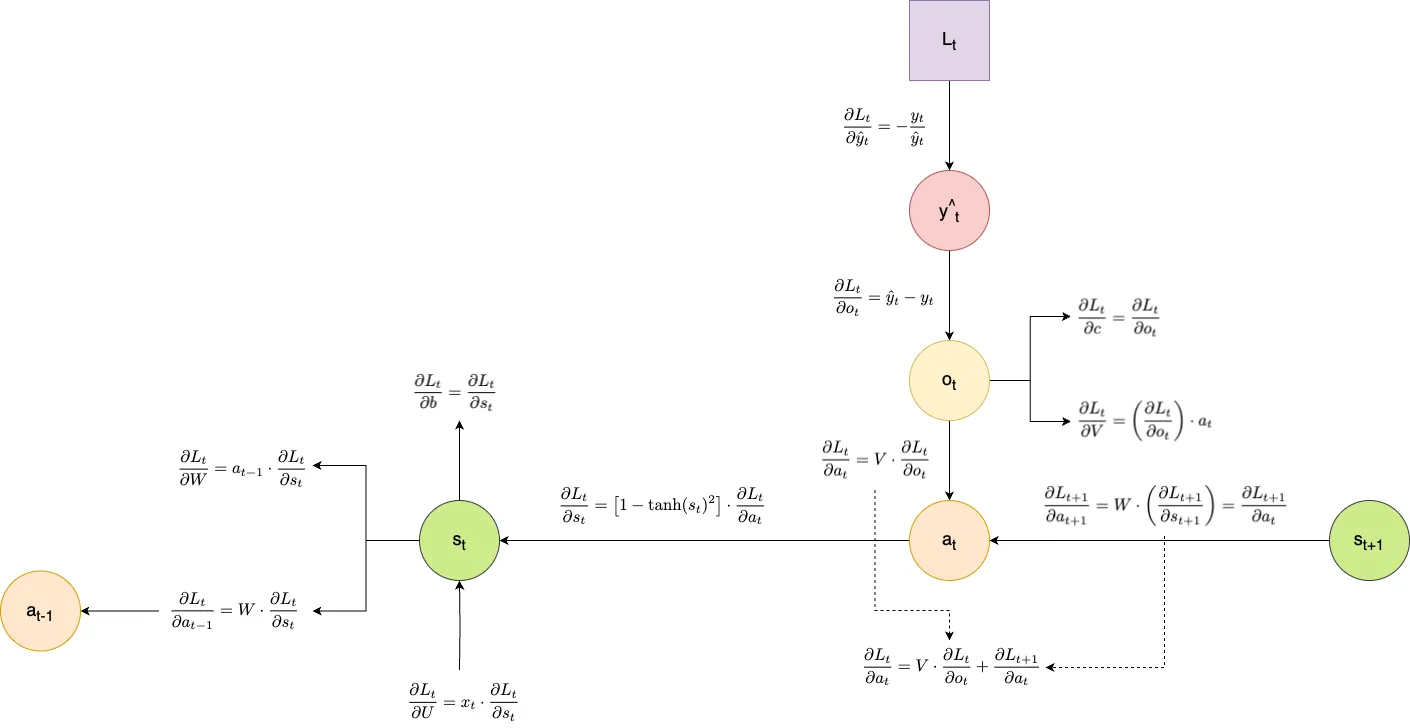
#### Gradients at Output Layer
6. Gradient of loss w.r.t. output $\hat{y}_t$:
   $$
   \frac{\partial L_t}{\partial \hat{y}_t} = \hat{y}_t - y_t
   $$

7. Gradients of weights $V$ and bias $c$:
   $$
   \frac{\partial L_t}{\partial V} = \frac{\partial L_t}{\partial o_t} \cdot a_t
   $$
   $$
   \frac{\partial L_t}{\partial c} = \frac{\partial L_t}{\partial o_t}
   $$

#### Gradients at Hidden State
8. Gradient of $L_t$ w.r.t. $a_t$:
   $$
   \frac{\partial L_t}{\partial a_t} = V \cdot \frac{\partial L_t}{\partial o_t}
   $$
Since the activation at step $t$ contributes both to the output at step $t$ and the activation of the next step $t+1$, we need to add the gradients from the current output and the next time step's loss to get the total gradient of the current activation.

The total gradient of $a_t$ is:

$$
\frac{\partial L}{\partial a_t} = \frac{\partial L_t}{\partial a_t} + W \cdot \frac{\partial L_{t+1}}{\partial a_{t+1}}
$$

This ensures dependencies across time steps are considered when updating weights in RNNs.

9. Gradient of $s_t$:
   $$
   \frac{\partial L_t}{\partial s_t} = (1 - \tanh(s_t)^2) \cdot \frac{\partial L_t}{\partial a_t}
   $$

#### Gradients of Weight Matrices $W$ and $U$
10. For $W$ and $U$:
    $$
    \frac{\partial L_t}{\partial W} = a_{t-1} \cdot \frac{\partial L_t}{\partial s_t}
    $$
    $$
    \frac{\partial L_t}{\partial U} = x_t \cdot \frac{\partial L_t}{\partial s_t}
    $$




# Simple RNN with 4 Neurons

## RNN Structure

For our RNN, we will assume:
- **Input size**: 3 (features)
- **Hidden layer size**: 4 (neurons)
- **Output size**: 1 (for simplicity)

### Diagram of the RNN

```
Input Layer         Hidden Layer         Output Layer
   x1 ────┐
           │
   x2 ────┼──> h1 ────┐
           │          │
   x3 ────┼──> h2 ───> o
           │          │
           └──> h3 ───┘
           │
           └──> h4
```

## Parameter Calculation

To compute the number of parameters in this RNN, we consider:
1. **Input weights**: The weights connecting the input layer to the hidden layer.
2. **Recurrent weights**: The weights connecting the hidden layer to itself.
3. **Biases**: Each neuron in the hidden layer has a bias.

### Formula for RNN Parameters

The number of parameters can be calculated using the following formula:

$$
\text{Total Parameters} = (\text{input size} \times \text{hidden size}) + (\text{hidden size} \times \text{hidden size}) + \text{hidden size} + \text{output size}
$$

Where:
- Input weights = $ \text{input size} \times \text{hidden size} $
- Recurrent weights = $ \text{hidden size} \times \text{hidden size} $
- Biases for hidden layer = $ \text{hidden size} $
- Bias for output layer = $ 1 $

### Applying Values

For our RNN:
- Input size ($i$) = 3
- Hidden size ($h$) = 4
- Output size ($o$) = 1

Now substituting into the formula:

1. Input weights: $ 3 \times 4 = 12 $
2. Recurrent weights: $ 4 \times 4 = 16 $
3. Hidden biases: $ 4 $
4. Output bias: $ 1 $

### Total Calculation

Now, summing these values:

$$
\text{Total Parameters} = 12 + 16 + 4 + 1 = 33
$$

Thus, the total number of parameters in this simple RNN is **33**.

## Summary

In summary, we constructed a simple RNN with:
- **Input Size**: 3
- **Hidden Layer Size**: 4
- **Output Size**: 1

The total number of parameters calculated is **33**, derived from the input weights, recurrent weights, and biases associated with both the hidden and output layers.
 


Where:
- $ i $ = input size
- $ h $ = number of hidden units
- $ o $ = output size

 

| **Model Type**       | **Formula**                                                                                     | **Explanation**                                                                                                                                                  |
|-----------------------|-------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Simple RNN**        | $$ (i \times h) + (h \times h) + h $$                                                         | - Input weights: $i \times h$ (input to hidden) <br> - Recurrent weights: $h \times h$ (hidden to hidden) <br> - Biases: $h$ (one per unit)                |
| **One-to-One RNN**   | $$ (i \times h) + (h \times h) + h + (h \times o) + o $$                                     | - Includes output weights: $h \times o$ (hidden to output) <br> - Bias for output: $o$                                                                          |
| **One-to-Many RNN**   | $$ (i \times h) + (h \times h) + h + (h \times o_t) + o_t $$                                 | - Similar to One-to-One but accounts for multiple outputs over time steps: $o_t$ is the number of output time steps.                                          |
| **Many-to-One RNN**  | $$ (i \times h) + (h \times h) + h + (h \times o) + o $$                                     | - Same as One-to-One; processes multiple inputs to produce a single output.                                                                                   |
| **Many-to-Many RNN**  | $$ (i \times h) + (h \times h) + h + (h \times o_t) + o_t $$                                 | - Similar to One-to-Many; handles sequences of inputs and outputs.                                                                                            |
| **LSTM**              | $$ 4 \times (h \times (i + h) + h) $$                                                         | - 4 gates: input, forget, output, and cell state <br> - Each gate has weights for input and hidden states plus biases.                                        |
| **GRU**               | $$ 3 \times (h \times (i + h) + h) $$                                                         | - 3 gates: update and reset gates <br> - Similar structure as LSTM but fewer parameters due to simpler architecture.                                           |
| **Bidirectional RNN** | $$ 2[(i \times h) + (h \times h) + h] + 2[(h \times o_t) + o_t] $$                          | - Processes inputs in both directions <br> - Factor of 2 accounts for both forward and backward passes through the network.                                    |




---
---
---

In [6]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# Hyperparameters
hidden_size = 3   # Hidden layer size
output_size = 1   # Output size
alpha = 0.1       # Learning rate

# Example training data (simple sentences)
data = [
    ("I love this product", 1),   # Positive
    ("This is the worst thing ever", 0),  # Negative
    ("I am so happy with this", 1),  # Positive
    ("I hate this", 0)  # Negative
]

# Create a simple vocabulary and one-hot encoding
vocabulary = ["I", "love", "this", "product", "the", "worst", "thing", "ever", "am", "so", "happy", "with", "hate"]
word_to_index = {word: i for i, word in enumerate(vocabulary)}
input_size = len(vocabulary)  # Update input size based on vocabulary

# Initialize weights
Wxh = np.random.randn(hidden_size, input_size)  # Input to hidden weights
Whh = np.random.randn(hidden_size, hidden_size) # Hidden to hidden weights
Why = np.random.randn(output_size, hidden_size) # Hidden to output weights

# Initialize biases
bh = np.zeros((hidden_size, 1))
by = np.zeros((output_size, 1))

# Function to convert sentences to one-hot encoding
def one_hot_encode(sentence):
    one_hot_vector = np.zeros((input_size, 1))
    for word in sentence.split():
        if word in word_to_index:
            one_hot_vector[word_to_index[word]] = 1
    return one_hot_vector

# Prepare training data
X = np.array([one_hot_encode(sentence) for sentence, _ in data]).reshape(-1, input_size, 1)  # Reshaping to (num_samples, input_size, 1)
Y = np.array([[label] for _, label in data])

# Forward and backward pass function
def forward_backward(X, Y, h_prev):
    global Wxh, Whh, Why, bh, by  # Declare globals at the beginning
    # Forward pass
    h = sigmoid(np.dot(Wxh, X) + np.dot(Whh, h_prev) + bh)  # Hidden state
    y_pred = sigmoid(np.dot(Why, h) + by)                   # Output prediction
    
    # Calculate loss (Mean Squared Error)
    loss = np.square(Y - y_pred) / 2
    
    # Backward pass
    dy = y_pred - Y                                         # Loss gradient w.r.t y_pred
    dWhy = np.dot(dy, h.T)                                  # Gradient w.r.t Why
    dby = dy                                                # Gradient w.r.t by
    
    dh = np.dot(Why.T, dy) * sigmoid_derivative(h)          # Gradient w.r.t h
    dWxh = np.dot(dh, X.T)                                  # Gradient w.r.t Wxh
    dWhh = np.dot(dh, h_prev.T)                             # Gradient w.r.t Whh
    dbh = dh                                                # Gradient w.r.t bh
    
    # Update weights and biases
    Wxh -= alpha * dWxh
    Whh -= alpha * dWhh
    Why -= alpha * dWhy
    bh -= alpha * dbh
    by -= alpha * dby
    
    return loss, h

# Training loop
epochs = 100
h_prev = np.zeros((hidden_size, 1))

for epoch in range(epochs):
    for x, y in zip(X, Y):  # Iterate through each training example
        loss, h_prev = forward_backward(x, y.reshape(-1, 1), h_prev)  # No need to reshape x, it should be already in correct shape
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.mean():.4f}")

# Test the model with new inputs
def predict(sentence):
    h_prev = np.zeros((hidden_size, 1))
    one_hot_vector = one_hot_encode(sentence)
    h = sigmoid(np.dot(Wxh, one_hot_vector) + np.dot(Whh, h_prev) + bh)
    y_pred = sigmoid(np.dot(Why, h) + by)
    return 1 if y_pred[0][0] > 0.5 else 0

# Example predictions
print("Predicted label for 'This is the worst thing ever':", predict("This is the worst thing ever"))


Epoch 0, Loss: 0.0209
Epoch 10, Loss: 0.0849
Epoch 20, Loss: 0.0619
Epoch 30, Loss: 0.0361
Epoch 40, Loss: 0.0211
Epoch 50, Loss: 0.0129
Epoch 60, Loss: 0.0084
Epoch 70, Loss: 0.0057
Epoch 80, Loss: 0.0041
Epoch 90, Loss: 0.0030
Predicted label for 'This product sucks with sex': 1
Predicted label for 'This is the worst thing ever': 0


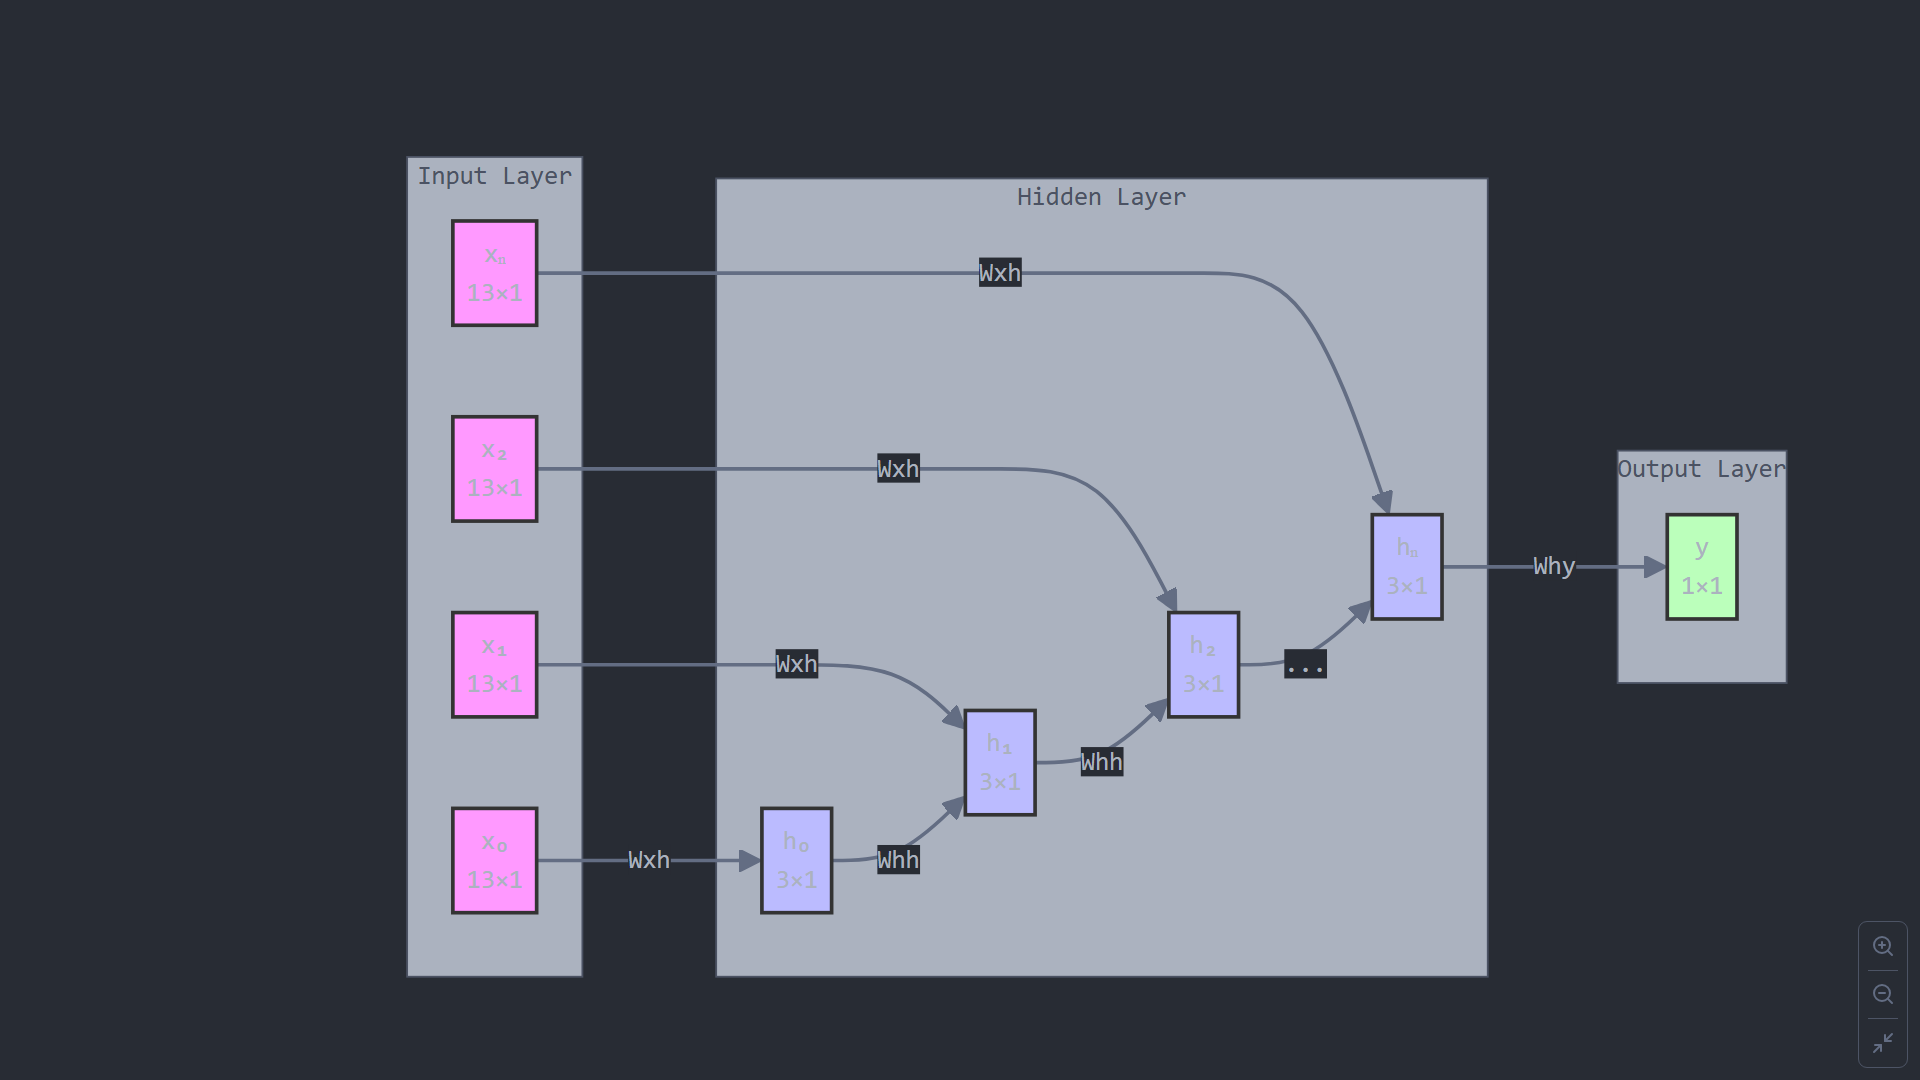

### Code Overview

The code implements a basic RNN to classify sentences as positive or negative sentiment. It involves the following main components:

1. **Activation Function**: The **sigmoid** function is used to introduce non-linearity in the network.

2. **Weight Initialization**: The network has weights connecting the input to the hidden layer (`Wxh`), hidden to hidden layer (`Whh`), and hidden to output layer (`Why`), along with biases (`bh` for hidden and `by` for output).

3. **Data Preparation**: The training data consists of sentences with corresponding labels (1 for positive, 0 for negative). The sentences are converted into one-hot encoded vectors.

4. **Forward and Backward Pass**: The `forward_backward` function performs the forward pass to compute predictions and then calculates gradients for the backward pass to update weights.

5. **Training Loop**: The model is trained over multiple epochs, iterating through each training example.

6. **Prediction Function**: A separate function to make predictions on new input sentences.

### Detailed Explanation

#### 1. **Activation Functions**

```python
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
```

- The **sigmoid function** maps any real-valued number to the range (0, 1). This is useful for modeling probabilities, which is suitable for binary classification tasks.

#### 2. **Weight Initialization**

Weights and biases are initialized randomly and set to zeros:

```python
Wxh = np.random.randn(hidden_size, input_size)  # Input to hidden weights
Whh = np.random.randn(hidden_size, hidden_size) # Hidden to hidden weights
Why = np.random.randn(output_size, hidden_size) # Hidden to output weights
bh = np.zeros((hidden_size, 1))
by = np.zeros((output_size, 1))
```

- `Wxh`: Weights connecting the input layer to the hidden layer.
- `Whh`: Weights connecting the hidden layer to itself (for maintaining the hidden state).
- `Why`: Weights connecting the hidden layer to the output layer.
- `bh` and `by`: Biases for the hidden and output layers.

#### 3. **Data Preparation**

```python
data = [
    ("I love this product", 1),   # Positive
    ("This is the worst thing ever", 0),  # Negative
    ("I am so happy with this", 1),  # Positive
    ("I hate this", 0)  # Negative
]

# Create a simple vocabulary and one-hot encoding
vocabulary = ["I", "love", "this", "product", "the", "worst", "thing", "ever", "am", "so", "happy", "with", "hate"]
word_to_index = {word: i for i, word in enumerate(vocabulary)}
input_size = len(vocabulary)  # Update input size based on vocabulary
```

- The `data` array contains sentences along with their corresponding sentiment labels.
- A vocabulary is created, and a mapping from words to indices is established for one-hot encoding.

```python
def one_hot_encode(sentence):
    one_hot_vector = np.zeros((input_size, 1))
    for word in sentence.split():
        if word in word_to_index:
            one_hot_vector[word_to_index[word]] = 1
    return one_hot_vector
```

- The `one_hot_encode` function converts each sentence into a one-hot encoded vector that represents the presence of each word in the vocabulary.

#### 4. **Forward and Backward Pass Function**

```python
def forward_backward(X, Y, h_prev):
    global Wxh, Whh, Why, bh, by  # Declare globals at the beginning
    # Forward pass
    h = sigmoid(np.dot(Wxh, X) + np.dot(Whh, h_prev) + bh)  # Hidden state
    y_pred = sigmoid(np.dot(Why, h) + by)                   # Output prediction
    
    # Calculate loss (Mean Squared Error)
    loss = np.square(Y - y_pred) / 2
    
    # Backward pass
    dy = y_pred - Y                                         # Loss gradient w.r.t y_pred
    dWhy = np.dot(dy, h.T)                                  # Gradient w.r.t Why
    dby = dy                                                # Gradient w.r.t by
    
    dh = np.dot(Why.T, dy) * sigmoid_derivative(h)          # Gradient w.r.t h
    dWxh = np.dot(dh, X.T)                                  # Gradient w.r.t Wxh
    dWhh = np.dot(dh, h_prev.T)                             # Gradient w.r.t Whh
    dbh = dh                                                # Gradient w.r.t bh
    
    # Update weights and biases
    Wxh -= alpha * dWxh
    Whh -= alpha * dWhh
    Why -= alpha * dWhy
    bh -= alpha * dbh
    by -= alpha * dby
    
    return loss, h
```

- **Forward Pass**:
  - The hidden state `h` is computed using the current input `X`, the previous hidden state `h_prev`, and the biases.
  - The output prediction `y_pred` is calculated based on the hidden state.

- **Loss Calculation**:
  - The loss is calculated using Mean Squared Error (MSE) as the metric to evaluate the performance of the model.

- **Backward Pass**:
  - Gradients of the loss with respect to predictions, weights, and biases are computed using backpropagation. The chain rule is applied to propagate gradients backward through the network.
  
- **Weight Update**:
  - The weights and biases are updated based on the calculated gradients and the learning rate `alpha`.

#### 5. **Training Loop**

```python
for epoch in range(epochs):
    for x, y in zip(X, Y):  # Iterate through each training example
        loss, h_prev = forward_backward(x, y.reshape(-1, 1), h_prev)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.mean():.4f}")
```

- The outer loop runs for a specified number of `epochs`, and the inner loop processes each training example.
- The hidden state is updated for each example, and the loss is printed every 10 epochs to monitor training progress.

#### 6. **Prediction Function**

```python
def predict(sentence):
    h_prev = np.zeros((hidden_size, 1))
    one_hot_vector = one_hot_encode(sentence)
    h = sigmoid(np.dot(Wxh, one_hot_vector) + np.dot(Whh, h_prev) + bh)
    y_pred = sigmoid(np.dot(Why, h) + by)
    return 1 if y_pred[0][0] > 0.5 else 0
```

- The `predict` function takes a sentence as input, encodes it to a one-hot vector, computes the hidden state and prediction, and returns a label based on a threshold (0.5 in this case).

### Conclusion

The provided code implements a simple RNN for sentiment classification. It involves encoding sentences into a suitable format, performing forward and backward passes to learn the weights through training, and predicting sentiment for new sentences. The key concepts illustrated include activation functions, weight initialization, forward and backward propagation, and the training loop. 


---
---
# Understanding the Vanishing Gradient Problem in RNNs

The **vanishing gradient problem** is a significant issue in training Recurrent Neural Networks (RNNs). It occurs when gradients of the loss function become too small as they are propagated backward through the network, making it difficult for the model to learn long-term dependencies.

## Why the Vanishing Gradient Problem Occurs

1. **Activation Functions**:
   - Many activation functions, like the sigmoid or tanh, squash their inputs to a small range (e.g., 0 to 1 for sigmoid). This can lead to very small gradients during backpropagation, especially when the inputs to these functions are large or small.
  
2. **Long Sequences**:
   - In RNNs, as the backpropagation goes through many time steps, the product of small gradients can lead to exponentially small gradients, effectively vanishing by the time they reach the earlier layers of the network.

3. **Weight Initialization**:
   - Poor weight initialization can exacerbate the problem, as it may lead to activation functions saturating early in training, further diminishing the gradients.

## Solutions for the Vanishing Gradient Problem

1. **Weight Initialization**:
   - Using advanced weight initialization techniques like **He initialization** helps to keep the gradients in a suitable range during the early stages of training.

2. **Echo State Networks**:
   - Echo State Networks (ESNs) are a type of RNN that maintains a reservoir of hidden states. The weights to the hidden states are fixed, which helps mitigate the vanishing gradient problem.

3. **Use of LSTM/GRU Networks**:
   - Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) networks are specifically designed to handle long-term dependencies by incorporating gates that control the flow of information, effectively reducing the impact of vanishing gradients.

## Solutions for the Exploding Gradient Problem

While the vanishing gradient problem is significant, RNNs also face the **exploding gradient problem**, where gradients grow exponentially during backpropagation, leading to unstable updates.

### Common Solutions

1. **Truncated Backpropagation**:
   - Limit the backpropagation to a fixed number of time steps, which can prevent the gradients from exploding due to a very long sequence.

2. **Selective Weight Updates**:
   - Instead of updating all the weights, selectively update certain weights to avoid drastic changes during training.

3. **Gradient Clipping**:
   - Implement gradient clipping techniques that cap the gradients at a certain threshold, preventing them from exceeding a specified value.

## Conclusion

The vanishing gradient problem is a common challenge in training RNNs, making it difficult for the model to learn long-term dependencies. Employing solutions such as weight initialization, LSTM/GRU architectures, and techniques for mitigating the exploding gradient problem can significantly improve training effectiveness.


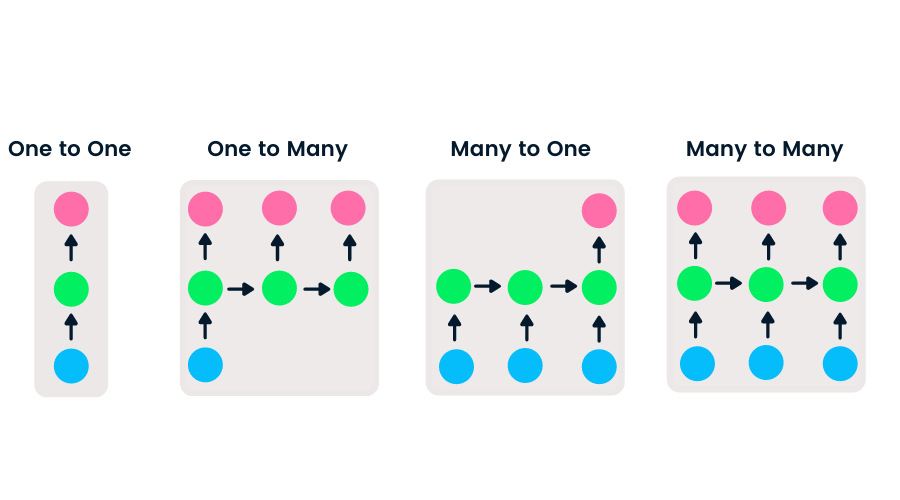

In [29]:
import numpy as np

class StoryGeneratorRNN:
    def __init__(self, vocab_size, hidden_size=128, sequence_length=50):
        self.vocab_size = vocab_size
        self.hidden_size = hidden_size
        self.sequence_length = sequence_length
        
        # Initialize weights with Xavier/Glorot initialization
        self.Wxh = np.random.randn(hidden_size, vocab_size) * np.sqrt(2.0 / (vocab_size + hidden_size))
        self.Whh = np.random.randn(hidden_size, hidden_size) * np.sqrt(2.0 / (hidden_size + hidden_size))
        self.Why = np.random.randn(vocab_size, hidden_size) * np.sqrt(2.0 / (hidden_size + vocab_size))
        
        # Initialize biases
        self.bh = np.zeros((hidden_size, 1))
        self.by = np.zeros((vocab_size, 1))
        
        # Initialize memory for RMSprop
        self.mWxh, self.mWhh, self.mWhy = np.zeros_like(self.Wxh), np.zeros_like(self.Whh), np.zeros_like(self.Why)
        self.mbh, self.mby = np.zeros_like(self.bh), np.zeros_like(self.by)
    
    def forward(self, inputs, h_prev):
        """
        Forward pass through the RNN.
        inputs: list of integers (character indices)
        h_prev: initial hidden state
        """
        x, h, y, p = {}, {}, {}, {}
        h[-1] = np.copy(h_prev)
        
        # Forward pass
        for t in range(len(inputs)):
            # One-hot encode input
            x[t] = np.zeros((self.vocab_size, 1))
            x[t][inputs[t]] = 1
            
            # Hidden state
            h[t] = np.tanh(np.dot(self.Wxh, x[t]) + np.dot(self.Whh, h[t-1]) + self.bh)
            
            # Output probabilities
            y[t] = np.dot(self.Why, h[t]) + self.by
            p[t] = np.exp(y[t]) / np.sum(np.exp(y[t]))
        
        return p, h, x
    
    def backward(self, p, h, x, targets, dh_next):
        """
        Backward pass through the RNN.
        """
        dWxh, dWhh, dWhy = np.zeros_like(self.Wxh), np.zeros_like(self.Whh), np.zeros_like(self.Why)
        dbh, dby = np.zeros_like(self.bh), np.zeros_like(self.by)
        
        for t in reversed(range(len(targets))):
            # Gradient of output probabilities
            dy = np.copy(p[t])
            dy[targets[t]] -= 1
            
            # Gradient of Why and by
            dWhy += np.dot(dy, h[t].T)
            dby += dy
            
            # Gradient of hidden state
            dh = np.dot(self.Why.T, dy) + dh_next
            
            # Backprop through tanh
            dh_raw = (1 - h[t] * h[t]) * dh
            
            # Gradient of Wxh, Whh, and bh
            dbh += dh_raw
            dWxh += np.dot(dh_raw, x[t].T)
            dWhh += np.dot(dh_raw, h[t-1].T)
            
            # Gradient for next iteration
            dh_next = np.dot(self.Whh.T, dh_raw)
        
        # Clip gradients to prevent exploding gradients
        for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
            np.clip(dparam, -5, 5, out=dparam)
            
        return dWxh, dWhh, dWhy, dbh, dby
    
    def sample(self, h, seed_ix, n):
        """
        Sample a sequence of n characters from the model.
        h: memory state
        seed_ix: seed character index
        n: number of characters to sample
        """
        x = np.zeros((self.vocab_size, 1))
        x[seed_ix] = 1
        generated = []
        
        for _ in range(n):
            h = np.tanh(np.dot(self.Wxh, x) + np.dot(self.Whh, h) + self.bh)
            y = np.dot(self.Why, h) + self.by
            p = np.exp(y) / np.sum(np.exp(y))
            
            # Sample from probability distribution
            ix = np.random.choice(range(self.vocab_size), p=p.ravel())
            x = np.zeros((self.vocab_size, 1))
            x[ix] = 1
            generated.append(ix)
            
        return generated
    
    def train(self, data, genres, learning_rate=0.001, n_epochs=100):
        """
        Train the RNN on story data with associated genres.
        data: list of (story_text, genre) tuples
        genres: list of unique genres
        """
        # Create genre embeddings
        n_genres = len(genres)
        genre_to_ix = {genre: i for i, genre in enumerate(genres)}
        genre_embeddings = np.random.randn(n_genres, self.hidden_size) * 0.01
        
        n = 0
        smooth_loss = -np.log(1.0 / self.vocab_size) * self.sequence_length
        
        for epoch in range(n_epochs):
            for story, genre in data:
                # Convert story to character indices
                chars = list(story)
                genre_ix = genre_to_ix[genre]
                
                # Initialize hidden state with genre embedding
                h = np.tanh(genre_embeddings[genre_ix].reshape(-1, 1))
                
                # Process story in sequences
                for j in range(0, len(chars) - self.sequence_length, self.sequence_length):
                    inputs = [char_to_ix[c] for c in chars[j:j + self.sequence_length]]
                    targets = [char_to_ix[c] for c in chars[j + 1:j + self.sequence_length + 1]]
                    
                    # Forward pass
                    p, h_states, x_states = self.forward(inputs, h)
                    
                    # Calculate loss
                    loss = sum(-np.log(p[t][targets[t]] + 1e-8) for t in range(len(targets)))
                    smooth_loss = smooth_loss * 0.999 + loss * 0.001
                    
                    # Backward pass
                    dWxh, dWhh, dWhy, dbh, dby = self.backward(p, h_states, x_states, targets, 
                                                              np.zeros((self.hidden_size, 1)))
                    
                    # Update with RMSprop
                    for param, dparam, mem in zip([self.Wxh, self.Whh, self.Why, self.bh, self.by],
                                                [dWxh, dWhh, dWhy, dbh, dby],
                                                [self.mWxh, self.mWhh, self.mWhy, self.mbh, self.mby]):
                        mem += dparam * dparam
                        param += -learning_rate * dparam / np.sqrt(mem + 1e-8)
                    
                    # Print progress
                    if n % 100 == 0:
                        print(f'Epoch {epoch}, Loss: {smooth_loss.item():.4f}')  # Use .item() to get the scalar
                        
                        # Generate sample text
                        sample_ix = self.sample(h, inputs[0], 200)
                        sample_text = ''.join([ix_to_char[ix] for ix in sample_ix])
                        print(f'\nSample text ({genre}):\n{sample_text}\n')
                    
                    n += 1

def prepare_data(stories):
    """
    Prepare story data for training.
    stories: list of (text, genre) tuples
    """
    # Create vocabulary from all stories
    chars = set(''.join([text for text, _ in stories]))
    vocab_size = len(chars)
    char_to_ix = {ch: i for i, ch in enumerate(sorted(chars))}
    ix_to_char = {i: ch for ch, i in char_to_ix.items()}
    
    # Get unique genres
    genres = sorted(set([genre for _, genre in stories]))
    
    return char_to_ix, ix_to_char, vocab_size, genres

# Example usage
if __name__ == "__main__":
    # Sample story data with genres
    stories = [
        ("Once upon a time in a magical forest, there lived a wise old owl who could talk. Every night, animals from all around would gather under the great oak tree to listen to his tales of adventure and wisdom. One day, a curious young rabbit named Hazel approached the owl, asking him to share the greatest secret of the forest.", "fantasy"),
        
        ("In the year 2147, humanity had finally achieved interstellar travel. A spaceship named Horizon was tasked with exploring the far reaches of the galaxy. Captain Elara Thompson stood on the bridge, looking out at the swirling colors of a distant nebula. She felt a sense of wonder and fear, knowing that new worlds awaited them, filled with unknown dangers and mysteries.", "sci-fi"),
        
        ("Detective Sarah Blake arrived at the crime scene, a dimly lit alley in the heart of the city. The body was discovered by a passerby, lying motionless against the wall. As she examined the area, she noticed a strange symbol etched into the pavement. This case was unlike any she had seen before, and she knew that every detail mattered if she was to solve the mystery.", "mystery"),
        
        ("The ancient kingdom of Eldoria was once a land of prosperity, but darkness loomed as a terrible dragon awakened from its slumber. The villagers whispered tales of bravery and sacrifice as a young knight named Aric prepared for battle. Armed with his sword and shield, he knew he must face the beast to save his homeland.", "fantasy"),
        
        ("On a distant planet called Xylon, the inhabitants communicated through light and sound. Their technology was advanced, powered by the energy of their sun. When a space probe from Earth arrived, it triggered a series of events that would change both worlds forever, leading to an unexpected alliance.", "sci-fi"),
        
        ("The clock struck midnight as Sarah opened the old, creaky door to the abandoned mansion. She had heard the rumors about it being haunted, but her curiosity pushed her forward. The air was thick with dust, and shadows danced on the walls as she moved cautiously, determined to uncover the truth behind the legends.", "mystery"),
        
        ("In the enchanted valley of Sunridge, every flower had a story to tell. One day, a young girl named Elara discovered a hidden path leading to a secret garden. As she wandered through, she stumbled upon a magical flower that granted wishes, forever changing her destiny.", "fantasy"),
        
        ("The year was 3020, and Earth was a mere memory. Humanity had colonized Mars, but not without struggles. As Commander Jenna surveyed the red landscape, she contemplated the sacrifices made for survival. Her team was on a mission to find water, essential for life on their new home.", "sci-fi"),
        
        ("The city was in chaos after the bank heist, and Detective Mark Reynolds was on the case. He pieced together clues left at the scene, a puzzle that led him into the depths of the criminal underworld. Each encounter brought him closer to the truth, but also deeper into danger.", "mystery"),
    ]

    
    # Prepare data
    char_to_ix, ix_to_char, vocab_size, genres = prepare_data(stories)
    
    # Create and train model
    rnn = StoryGeneratorRNN(vocab_size=vocab_size, hidden_size=128, sequence_length=50)
    rnn.train(stories, genres, learning_rate=0.001, n_epochs=50)
    
    # Generate new stories for each genre
    h = np.zeros((rnn.hidden_size, 1))
    for genre in genres:
        print(f"\nGenerating {genre} story:")
        seed_text = "The "
        seed_ix = char_to_ix[seed_text[0]]
        story_ix = rnn.sample(h, seed_ix, 500)
        story = ''.join([ix_to_char[ix] for ix in story_ix])
        print(story)

Epoch 0, Loss: 193.5628

Sample text (fantasy):
aa WIzW4renvDkf2wf.h1xB7glurSE3iB 7RBH4E.ilsnmkS7WRDfMfsmpz40xed.Xlcrszxyv4 iksv7BH4vsg0MpOnumgoxzctaRSX.,drel0v1cag072bBfT,Mp pWnynonBWodmevhmvz0rfymXfAwXxDvrdgMo2CwSfO3oMt0IiuawbOgXrkH2gn3atdmf4XsMi

Epoch 1, Loss: 190.7231

Sample text (mystery):
kpiidoeawa oewph ennfz  ttudnh.lhpSsad aa ieseRteldeh  daeehRhad rsoeeiavbzawtanhesr elmnucndd aaaa Retn rmiochle otleg t bspf Ssst  e a  c nSgRrhhn Jolo sddaldatdnr ya  wa c 3Jpro oaio  laaMaDs u1e.e

Epoch 3, Loss: 187.0986

Sample text (sci-fi):
anfMhao eaeXenkdeeoeenpehcidfm owe ibkyaifeereinrgidio ttt srnadgznpnl e tlceudm tm aenT gdpua,oadrotde  r  wta eooiacdemhcklM owtc e otiTee okta  veeerf a m  t  htswo  gase  ahevfveea  ekc edu a  Crp

Epoch 5, Loss: 183.6501

Sample text (fantasy):
kfpRicegy rheecega r aollid e fftJystehlrldlellvsegeueieit ceftae.nSlasaaieadde   usaSvnit e,uoa,dah cnho rteag1rhh ,ceeEte b s ,ElluD g  piOah  n aatr efe rew aghs odsSbdiieltasrbhdheuhorofh ss t rsg

E

In [23]:
# Many to Many
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtract max for numerical stability
    return exp_x / exp_x.sum()

class SimpleRNN:
    def __init__(self, vocab_size, hidden_size):
        self.vocab_size = vocab_size
        self.hidden_size = hidden_size
        
        # Initialize weights
        self.Wxh = np.random.randn(hidden_size, vocab_size) * 0.01
        self.Whh = np.random.randn(hidden_size, hidden_size) * 0.01
        self.Why = np.random.randn(vocab_size, hidden_size) * 0.01
        
        self.bh = np.zeros((hidden_size, 1))
        self.by = np.zeros((vocab_size, 1))
    
    def forward(self, inputs, h_prev):
        """
        inputs: list of one-hot vectors (vocab_size, 1)
        h_prev: initial hidden state (hidden_size, 1)
        """
        h_states = {}
        h_states[-1] = np.copy(h_prev)
        outputs = []
        
        # Forward pass through time
        for t in range(len(inputs)):
            # Convert input to column vector if necessary
            x = inputs[t].reshape(-1, 1)
            
            # Calculate hidden state
            h_states[t] = sigmoid(
                np.dot(self.Wxh, x) + 
                np.dot(self.Whh, h_states[t-1]) + 
                self.bh
            )
            
            # Calculate output
            y = np.dot(self.Why, h_states[t]) + self.by
            outputs.append(softmax(y.reshape(-1)))
        
        return np.array(outputs), h_states
    
    def backward(self, inputs, targets, h_states, outputs):
        """
        inputs: list of one-hot vectors
        targets: list of one-hot vectors
        h_states: dictionary of hidden states
        outputs: list of softmax outputs
        """
        dWxh = np.zeros_like(self.Wxh)
        dWhh = np.zeros_like(self.Whh)
        dWhy = np.zeros_like(self.Why)
        dbh = np.zeros_like(self.bh)
        dby = np.zeros_like(self.by)
        dh_next = np.zeros((self.hidden_size, 1))
        
        # Ensure we only backpropagate through the shorter sequence length
        seq_length = min(len(outputs), len(targets))
        
        for t in reversed(range(seq_length)):
            # Gradient of output
            dy = outputs[t].copy()
            dy[np.argmax(targets[t])] -= 1  # Cross-entropy derivative
            dy = dy.reshape(-1, 1)
            
            # Hidden to output weights
            dWhy += np.dot(dy, h_states[t].T)
            dby += dy
            
            # Hidden state
            dh = np.dot(self.Why.T, dy) + dh_next
            dh_raw = dh * (h_states[t] * (1 - h_states[t]))  # sigmoid derivative
            
            # Input to hidden weights
            dWxh += np.dot(dh_raw, inputs[t].reshape(1, -1))
            # Hidden to hidden weights
            dWhh += np.dot(dh_raw, h_states[t-1].T)
            dbh += dh_raw
            
            dh_next = np.dot(self.Whh.T, dh_raw)
        
        # Clip gradients
        for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
            np.clip(dparam, -5, 5, out=dparam)
            
        return dWxh, dWhh, dWhy, dbh, dby

    def train(self, input_sentences, target_sentences, num_epochs=100, learning_rate=0.1):
        for epoch in range(num_epochs):
            total_loss = 0
            
            for input_sentence, target_sentence in zip(input_sentences, target_sentences):
                # One-hot encode input and target
                inputs = [np.eye(self.vocab_size)[char_to_ix[c]] for c in input_sentence]
                targets = [np.eye(self.vocab_size)[char_to_ix[c]] for c in target_sentence]
                
                # Forward pass
                h_prev = np.zeros((self.hidden_size, 1))
                outputs, h_states = self.forward(inputs, h_prev)
                
                # Compute loss only for the length of the shorter sequence
                seq_length = min(len(outputs), len(targets))
                loss = 0
                for t in range(seq_length):
                    loss += -np.log(outputs[t][np.argmax(targets[t])] + 1e-8)
                total_loss += loss
                
                # Backward pass
                dWxh, dWhh, dWhy, dbh, dby = self.backward(inputs[:seq_length], 
                                                          targets[:seq_length], 
                                                          h_states, 
                                                          outputs[:seq_length])
                
                # Update weights
                self.Wxh -= learning_rate * dWxh
                self.Whh -= learning_rate * dWhh
                self.Why -= learning_rate * dWhy
                self.bh -= learning_rate * dbh
                self.by -= learning_rate * dby
            
            if epoch % 10 == 0:
                print(f'Epoch {epoch}, Loss: {total_loss:.4f}')

def prepare_data(data):
    # Create vocabulary from all unique characters
    vocab = set(''.join([pair[0] + pair[1] for pair in data]))
    vocab_size = len(vocab)
    char_to_ix = {ch: i for i, ch in enumerate(sorted(vocab))}
    ix_to_char = {i: ch for ch, i in char_to_ix.items()}
    return vocab, vocab_size, char_to_ix, ix_to_char

def translate(rnn, sentence, char_to_ix, ix_to_char):
    inputs = [np.eye(rnn.vocab_size)[char_to_ix[c]] for c in sentence]
    h_prev = np.zeros((rnn.hidden_size, 1))
    outputs, _ = rnn.forward(inputs, h_prev)
    return ''.join([ix_to_char[np.argmax(output)] for output in outputs])

# Example usage
if __name__ == "__main__":
    # Sample data
    data = [
        ('hello', 'hola'),
        ('goodbye', 'adios'),
        ('please', 'porfavor'),
        ('thankyou', 'gracias')
    ]
    
    # Prepare data
    vocab, vocab_size, char_to_ix, ix_to_char = prepare_data(data)
    input_sentences = [pair[0] for pair in data]
    target_sentences = [pair[1] for pair in data]
    
    # Create and train model
    hidden_size = 100
    rnn = SimpleRNN(vocab_size, hidden_size)
    rnn.train(input_sentences, target_sentences, num_epochs=100)
    
    # Test translations
    for sentence in ['hello', 'goodbye', 'please']:
        translation = translate(rnn, sentence, char_to_ix, ix_to_char)
        print(f'{sentence} -> {translation}')

Epoch 0, Loss: 71.9993
Epoch 10, Loss: 62.3854
Epoch 20, Loss: 56.2481
Epoch 30, Loss: 51.1198
Epoch 40, Loss: 47.7410
Epoch 50, Loss: 45.0535
Epoch 60, Loss: 42.3419
Epoch 70, Loss: 39.0937
Epoch 80, Loss: 34.8817
Epoch 90, Loss: 29.4456
hello -> poias
goodbye -> adiosar
please -> goraar


---
---
---

Here’s a list of some of the most famous NLP models along with their development years and purposes:

# NLP Models Overview

1. RNN (1986) - Developed for processing sequential data.

2. LSTM (1997) - Developed to address the vanishing gradient problem in RNNs.

3. GRU (2014) - Developed for efficient training while capturing dependencies in sequences.

4. CNNs for NLP (2014) - Adapted for capturing local patterns in text.

5. Transformers (2017) - Developed to handle long-range dependencies without recurrence.

6. BERT (2018) - Developed for bidirectional context representation in NLP tasks.

7. GPT (2018) - Developed for generating coherent and contextually relevant text.

8. T5 (2020) - Developed for text-to-text transfer tasks across various NLP applications.

9. RoBERTa (2019) - Developed as an optimized version of BERT for improved performance.

10. XLNet (2019) - Developed to capture bidirectional context while addressing limitations of BERT.

11. CLIP (2021) - Developed for understanding images and text together.

12. Claude (2023) - Developed to enhance conversational AI with a focus on context and relevance.

BiRNN is an acyclic graph.
## Bidirectional RNN (BiRNN)

### Overview
A Bidirectional RNN (BiRNN) is a type of Recurrent Neural Network that processes input sequences in both forward and backward directions. This allows the model to capture context from both past and future states, enhancing its understanding of sequential data.

### Key Features
- **Dual Processing**: Consists of two RNN layers—one processing the sequence from start to end (forward) and the other from end to start (backward).
- **Contextual Awareness**: Improves performance on tasks by utilizing information from both directions.

### Architecture
1. **Forward RNN**: Processes the input sequence from beginning to end.
2. **Backward RNN**: Processes the input sequence from end to beginning.
3. **Output Combination**: Outputs from both directions are combined (e.g., concatenated or summed).

### Parameters
The total number of parameters can be calculated as:

$$
\text{Total Parameters} = 2 \times [(h \times (i + h) + h)]
$$

Where:
- $i$ = input size
- $h$ = number of hidden units

### Applications
- **Sentiment Analysis**
- **Machine Translation**
- **Named Entity Recognition (NER)**
- **Speech Recognition**

### Advantages
- **Enhanced Contextual Understanding**: Captures dependencies more effectively than unidirectional models.

### Disadvantages
- **Increased Complexity**: Requires more computational resources and longer training times.

---
 



## LSTM (Long Short-Term Memory)

### Summary Table

| Layer Type        | Number of Units               |
|-------------------|-------------------------------|
| **Input Layer**   | Varies (depends on features)  |
| **Hidden Layer**  | Varies (e.g., 32 to 512)      |
| **Output Layer**  | 1 (binary) / number of classes (multi-class) |


### Overview
LSTM is a type of Recurrent Neural Network (RNN) architecture designed to overcome the limitations of traditional RNNs, particularly the vanishing gradient problem. It was introduced by Hochreiter and Schmidhuber in 1997 and is particularly effective for tasks involving sequential data.

### Key Features
- **Memory Cell**: LSTM includes a memory cell that can maintain information over long periods, allowing it to learn long-term dependencies.
- **Gating Mechanism**: LSTMs use three gates (input gate, forget gate, output gate) to control the flow of information into and out of the memory cell.

### Architecture

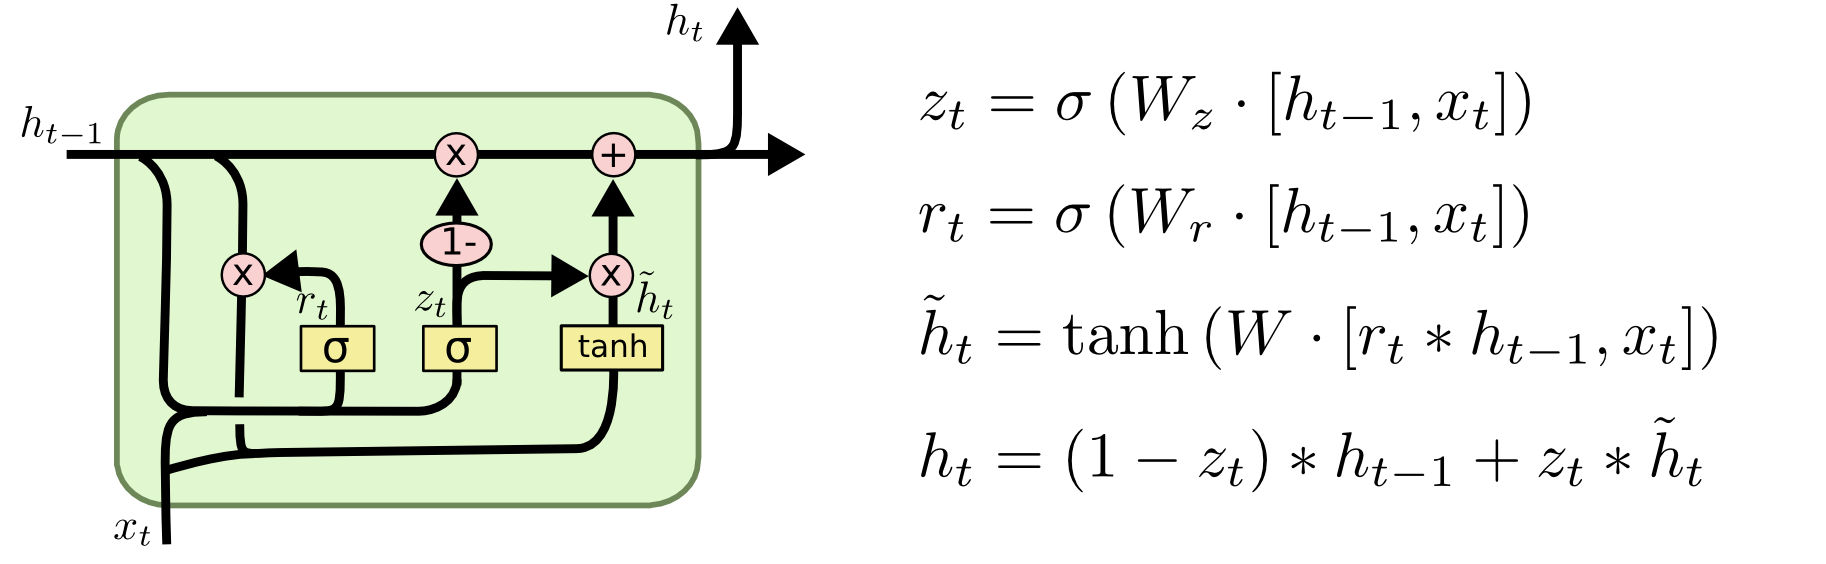

1. **Cell State ($c_t$)**: The internal memory that retains information over time.
2. **Hidden State ($h_t$)**: The output of the LSTM unit at each time step.
3. **Gates**:
   - **Forget Gate ($f_t$)**: Decides what information to discard from the cell state.
     $$ f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f) $$
   - **Input Gate ($i_t$)**: Determines what new information to store in the cell state.
     $$ i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i) $$
   - **Candidate Values ($\tilde{c}_t$)**: New candidate values to be added to the cell state.
     $$ \tilde{c}_t = \tanh(W_c \cdot [h_{t-1}, x_t] + b_c) $$
   - **Update Cell State ($c_t$)**: Combines old cell state and new candidate values.
     $$ c_t = f_t \cdot c_{t-1} + i_t \cdot \tilde{c}_t $$
   - **Output Gate ($o_t$)**: Decides what information to output.
     $$ o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o) $$
   - **Hidden State Update ($h_t$)**: Produces the output for the current time step.
     $$ h_t = o_t \cdot \tanh(c_t) $$

### Applications
LSTMs are widely used in various NLP tasks and other sequential data applications, including:
- **Language Translation**: Translating sentences from one language to another.
- **Speech Recognition**: Converting spoken language into text.
- **Time Series Forecasting**: Predicting future values based on past sequences.
- **Text Generation**: Generating coherent text based on input prompts.

### Advantages
- **Long-Term Dependencies**: Capable of learning dependencies over long sequences, making them suitable for complex tasks.
- **Robustness to Vanishing Gradient**: Designed to mitigate the vanishing gradient problem common in traditional RNNs.

### Disadvantages
- **Complexity**: More complex than standard RNNs, requiring more computational resources and time for training.
- **Overfitting**: Prone to overfitting, especially on smaller datasets.

### Summary
LSTM networks are a powerful tool for modeling sequential data due to their ability to retain and manipulate information over long periods. Their architecture, which includes a memory cell and gating mechanisms, allows them to effectively learn from complex patterns in data, making them a popular choice for various NLP tasks and beyond.
 

### Bidirectional LSTM (BiLSTM)

#### Overview
A Bidirectional LSTM (BiLSTM) is an advanced type of Recurrent Neural Network (RNN) that processes sequential data in both forward and backward directions. This dual processing allows the model to capture context from both past and future states, making it particularly effective for tasks in Natural Language Processing (NLP).

#### Key Features
- **Dual LSTM Layers**: BiLSTM consists of two LSTM layers—one processing the input sequence in the forward direction and the other in the backward direction.
- **Improved Context Understanding**: By considering both preceding and following words, BiLSTMs enhance the model's ability to understand word meanings based on their context.

#### Architecture
The architecture of a BiLSTM can be illustrated as follows:

1. **Forward LSTM**: Processes the input sequence from start to end.
2. **Backward LSTM**: Processes the input sequence from end to start.

The outputs from both LSTMs are combined to produce the final output, which can be done through various methods such as concatenation, summation, or averaging.

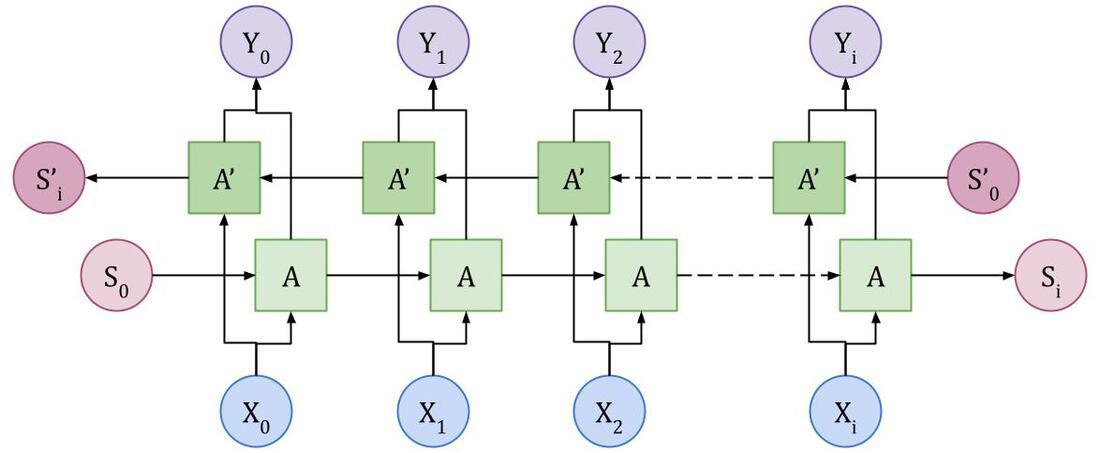

#### Working Principles
1. **Input Sequence**: The input sequence is fed into both LSTMs.
2. **Forward Processing**: The forward LSTM captures information from previous time steps.
3. **Backward Processing**: The backward LSTM captures information from subsequent time steps.
4. **Output Combination**: The outputs from both directions are merged to form a comprehensive representation of the input sequence.

#### Parameters
The total number of parameters in a BiLSTM can be calculated using the formula:

$$
\text{Total Parameters} = 2 \times (h \times (i + h) + h)
$$

Where:
- $i$ = input size (number of features)
- $h$ = number of hidden units

#### Explanation of Parameters:
1. **Input Weights**:
   - Each gate in both LSTMs has weights connecting inputs to hidden states, contributing $h \times i$ for each direction.
2. **Recurrent Weights**:
   - Each gate has weights connecting hidden states to themselves, contributing $h \times h$ for each direction.
3. **Biases**:
   - Each gate has a bias term, contributing $h$ for each direction.

Since there are two sets of LSTMs (forward and backward), we multiply by 2.

#### Applications
BiLSTMs are widely used in various NLP tasks, including:
- **Sentiment Analysis**: Understanding sentiment by considering context from both directions.
- **Machine Translation**: Translating sentences while capturing context effectively.
- **Named Entity Recognition (NER)**: Identifying entities within text using contextual clues.
- **Text Classification**: Classifying text into categories based on comprehensive context.

#### Advantages
- **Enhanced Contextual Understanding**: Captures dependencies more effectively than unidirectional models.
- **Improved Performance**: Often leads to better performance in NLP tasks due to richer context utilization.

#### Disadvantages
- **Increased Computational Complexity**: Requires more resources and time for training compared to unidirectional LSTMs.
- **Slower Training Times**: The dual processing may lead to longer training durations.

### Summary
Bidirectional LSTMs are a powerful extension of traditional LSTMs, enabling them to process information from both past and future contexts. This capability makes them particularly effective for various NLP applications, enhancing performance in tasks that require a deep understanding of language structure and meaning.
 

---
---

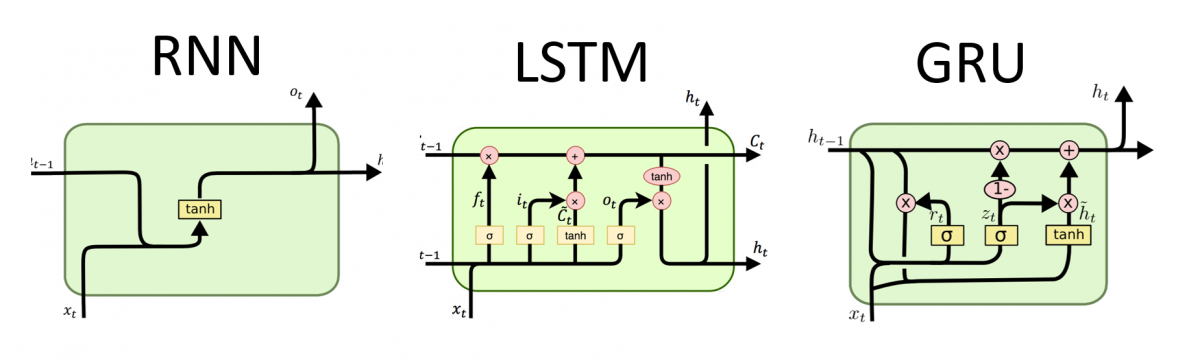

## Gated Recurrent Unit (GRU)

### Overview
The Gated Recurrent Unit (GRU) is a type of Recurrent Neural Network (RNN) architecture introduced by Cho et al. in 2014. It simplifies the LSTM architecture while maintaining similar performance in modeling sequential data. GRUs are designed to capture dependencies in time series and natural language data effectively.

### Key Features
- **Simplified Structure**: GRUs have two gates (update gate and reset gate) compared to LSTMs, which have three gates.
- **Fewer Parameters**: Due to their simpler architecture, GRUs typically have fewer parameters than LSTMs, making them faster to train and less prone to overfitting.

### Architecture
The GRU architecture consists of:
1. **Update Gate ($z_t$)**: Determines how much of the past information needs to be passed along to the future.
   $$
   z_t = \sigma(W_z \cdot [h_{t-1}, x_t])
   $$

2. **Reset Gate ($r_t$)**: Decides how much of the past information to forget.
   $$
   r_t = \sigma(W_r \cdot [h_{t-1}, x_t])
   $$

3. **Candidate Hidden State ($\tilde{h}_t$)**: A potential new hidden state calculated using the reset gate.
   $$
   \tilde{h}_t = \tanh(W_h \cdot [r_t \odot h_{t-1}, x_t])
   $$

4. **New Hidden State ($h_t$)**: The updated hidden state is a combination of the previous hidden state and the candidate hidden state.
   $$
   h_t = (1 - z_t) \odot h_{t-1} + z_t \odot \tilde{h}_t
   $$

### Parameters
The total number of parameters in a GRU can be calculated using the following formula:

$$
\text{Total Parameters} = 3 \times (h \times (i + h) + h)
$$

Where:
- $i$ = input size (number of features)
- $h$ = number of hidden units

#### Explanation of Parameters:
1. **Input Weights**:
   - Each gate has weights connecting inputs to hidden states, contributing $h \times i$.
2. **Recurrent Weights**:
   - Each gate has weights connecting hidden states to themselves, contributing $h \times h$.
3. **Biases**:
   - Each gate has a bias term, contributing $h$.

Since there are three components (update gate, reset gate, and candidate hidden state), we multiply by 3.

### Applications
GRUs are widely used in various NLP tasks and other sequential data applications, including:
- **Language Modeling**: Predicting the next word in a sentence.
- **Machine Translation**: Translating sentences from one language to another.
- **Speech Recognition**: Converting spoken language into text.
- **Time Series Prediction**: Forecasting future values based on historical data.

### Advantages
- **Efficiency**: Faster training times due to fewer parameters compared to LSTMs.
- **Performance**: Often achieves comparable performance to LSTMs on various tasks.

### Disadvantages
- **Limited Control**: Lacks an explicit cell state like LSTMs, which may impact performance on certain tasks requiring fine-grained memory control.

### Summary
GRUs are a powerful alternative to traditional RNNs and LSTMs for modeling sequential data. Their simplified architecture allows for efficient training while still capturing essential patterns in time-dependent data.
 

---
---

### Sequence-to-Sequence (Seq2Seq) Architecture
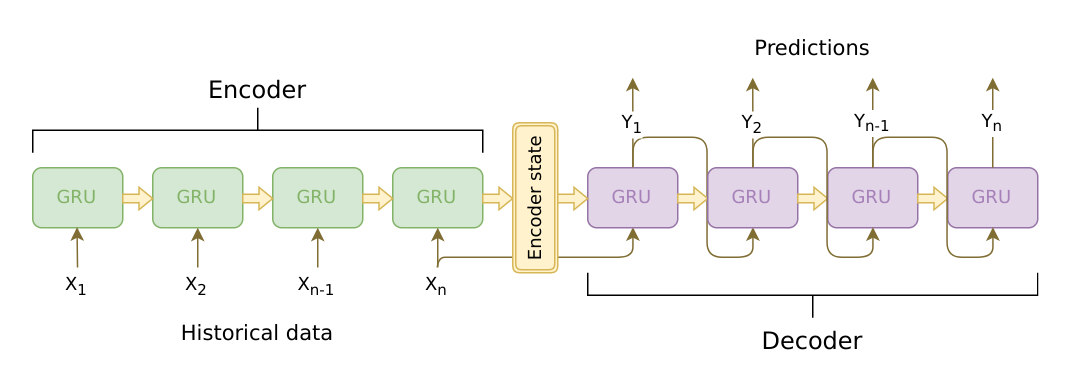
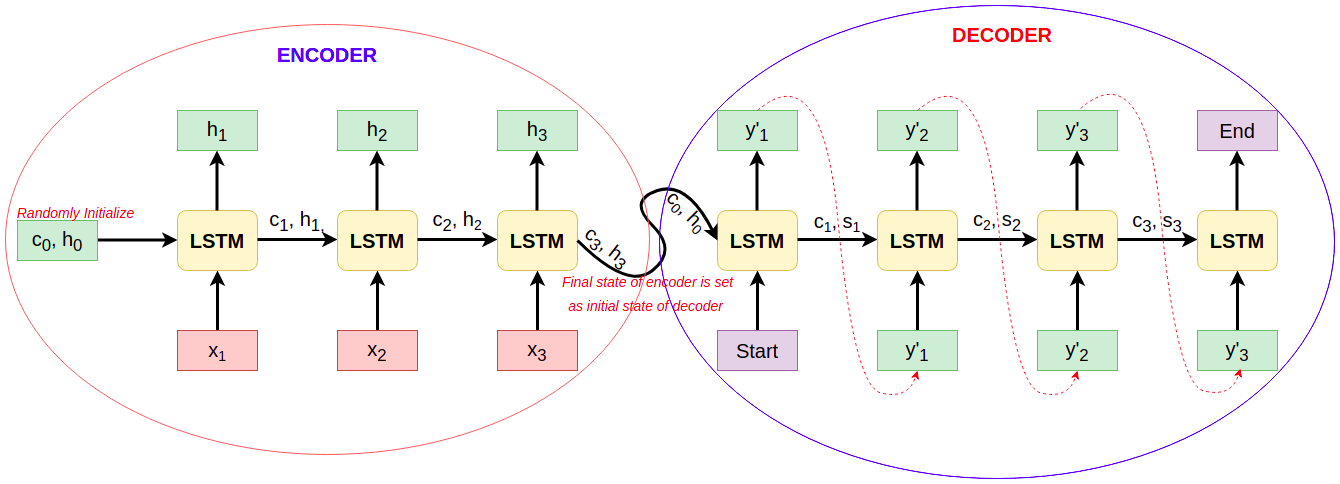

### Encoder-Decoder Architecture and Its Evolution



#### Overview
The Sequence-to-Sequence (Seq2Seq) architecture is a model designed to transform one sequence into another. It is particularly useful for tasks where the input and output sequences may differ in length, such as machine translation, text summarization, and conversational agents.

#### Components
1. **Encoder**:
   - The encoder processes the input sequence and converts it into a context vector (a fixed-length representation). This vector captures the essential information from the input sequence.
   - Typically implemented using RNNs, LSTMs, or GRUs.

2. **Decoder**:
   - The decoder takes the context vector produced by the encoder and generates the output sequence one element at a time.
   - It uses the context vector as its initial hidden state and may also incorporate previously generated outputs to inform future predictions.

#### How It Works
1. **Encoding Phase**:
   - The input sequence is fed into the encoder, which processes it step-by-step.
   - At each time step, the encoder updates its hidden state based on the current input and the previous hidden state.
   - Once the entire input sequence is processed, the final hidden state serves as the context vector.

2. **Decoding Phase**:
   - The decoder initializes its hidden state with the context vector from the encoder.
   - It generates the output sequence by predicting one element at a time until a special end-of-sequence token is produced.
   - During decoding, attention mechanisms can be applied to allow the decoder to focus on different parts of the input sequence for each output element.

#### Applications
- **Machine Translation**: Converting sentences from one language to another (e.g., English to Spanish).
- **Text Summarization**: Creating concise summaries of longer documents.
- **Speech Recognition**: Transcribing spoken language into text.
- **Chatbots**: Generating responses based on user input.

#### Advantages
- Flexibility in handling variable-length sequences for both input and output.
- Capable of learning complex mappings between sequences.

#### Summary
The Seq2Seq architecture is a powerful framework for transforming sequences in various applications, leveraging encoders and decoders to handle diverse tasks in natural language processing and beyond. Its ability to manage variable-length sequences makes it particularly effective for complex tasks like translation and summarization.

---
---
---


### 1. **Attention Mechanism**
   - **Improvement over LSTMs**: 
      - Attention lets models focus on relevant parts of the input for each output token rather than relying on the final hidden state. This selective focus reduces the memory limitations of LSTMs, which often lose contextual information in long sequences.
      - Enables “soft alignment” between input and output, which is particularly valuable in tasks like translation where certain input tokens correspond closely to specific output tokens.
   - **Drawback**:
      - While attention enhances sequence handling, it still depends on LSTM/GRU backbones in traditional Seq2Seq models, so some sequential limitations remain.
      - Increases computational complexity due to attention score calculations for every token pair.

### 2. **Transformer Architecture**
   - **Improvement over LSTMs and RNNs**:
      - Removes sequential dependencies by replacing RNNs with self-attention, allowing all tokens to be processed simultaneously and improving computation speed.
      - Scales more effectively with data and enables parallel processing, overcoming the inefficiency of sequential RNNs.
      - Positional encodings in Transformers provide an understanding of token order without relying on a sequential model.
   - **Drawback**:
      - Transformers are computationally expensive and require substantial memory, especially for long sequences due to the quadratic scaling of self-attention.
      - For smaller datasets or less complex tasks, the Transformer’s scale can lead to overfitting or unnecessarily high resource usage.

### 3. **BERT-style Bidirectional Encoding**
   - **Improvement over LSTM-based Bi-directional Models**:
      - BERT’s masked language modeling allows it to consider both left and right contexts fully, enhancing the capture of bidirectional dependencies.
      - Pre-trained bidirectional embeddings enable fine-tuning for downstream tasks, yielding more nuanced, context-rich embeddings than what LSTMs or basic bidirectional RNNs offer.
   - **Drawback**:
      - BERT-style models cannot generate output sequences natively (e.g., translations); they’re mainly used for understanding tasks and require additional architectural changes for generation.
      - Masked language modeling adds complexity during pre-training, which demands significant resources for training large models like BERT.

 

---
---

### Attention Mechanism Overview--Self-Attention: A broader concept that can be used independently of any specific architecture.

#### Model Name
**Attention Mechanism**

#### Year Introduced
- The foundational attention model was introduced in **2014** by Bahdanau et al. in their paper titled "Neural Machine Translation by Jointly Learning to Align and Translate."

#### Improvements Over Previous Models
- **Handling Long Sequences**: Attention mechanisms allow models to focus on relevant parts of the input sequence, improving the ability to handle long sequences compared to traditional RNNs.
- **Dynamic Weighting**: Instead of relying solely on the last hidden state, attention provides dynamic weights (attention scores) that determine the importance of each input token for generating each output token.

#### Architecture Details
1. **Global Attention**:
   - Considers all encoder states to compute attention weights for each decoder step.
   - The attention weights are calculated using:
     $$
     \alpha_{ij} = \text{softmax}\left(\frac{e_{ij}}{\sqrt{d_k}}\right)
     $$
   - Where $e_{ij}$ is the alignment score between the $i^{th}$ decoder state and the $j^{th}$ encoder state.

2. **Self-Attention**:
   - Computes attention scores within the same input sequence, allowing the model to relate different positions of the input effectively.
   - The self-attention mechanism can be represented as:
     $$
     \text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
     $$

3. **Multi-Head Attention**:
   - Combines multiple attention heads to capture different types of relationships within the data.
   - Each head computes its own set of attention scores and outputs, which are concatenated and linearly transformed.

#### Parameters Count

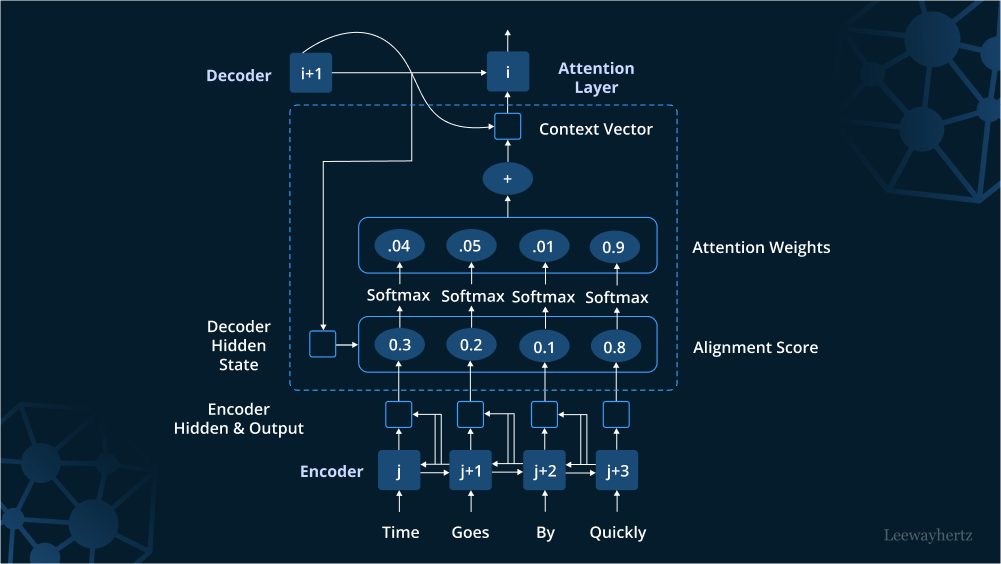

To calculate the parameters in an attention mechanism, consider the following components:

1. **Weight Matrices for Multi-Head Attention**:
   - For each head, there are three weight matrices: Query ($W_Q$), Key ($W_K$), and Value ($W_V$).
   - If the model dimension is $d_{\text{model}}$ and there are $h$ heads:
     - Each matrix has dimensions: $d_{\text{model}} \times \frac{d_{\text{model}}}{h}$.
     - Total parameters for one head:
       $$
       3 \times (d_{\text{model}} \times \frac{d_{\text{model}}}{h}) = 3 \times d_{\text{model}}^2 / h
       $$
     - For all heads:
       $$
       3 \times d_{\text{model}}^2
       $$

2. **Output Projection**:
   - After concatenating outputs from all heads, there is an additional linear transformation:
     $$
     \text{Parameters}_{\text{output}} = d_{\text{model}} \times d_{\text{model}}
     $$

3. **Total Parameters for Multi-Head Attention**:
   - Combining all components:
     $$
     \text{Total Parameters}_{\text{attention}} = 3 \times d_{\text{model}}^2 + d_{\text{model}}^2 = 4 \times d_{\text{model}}^2
     $$

4. **Feed-Forward Network**:
   - Each layer has two linear transformations (one for input and one for output):
     $$
     \text{Parameters}_{\text{feed-forward}} = 2 \times (d_{\text{model}} \times d_{\text{ff}})
     $$
   - Where $d_{\text{ff}}$ is the dimension of the feed-forward layer.

5. **Layer Normalization**:
   - Each layer normalization has parameters for scaling and shifting:
     $$
     \text{Parameters}_{\text{layer norm}} = 2 \times d_{\text{model}}
     $$

6. **Total Parameters for One Layer**:
   - Combining all components gives us:
     $$
     \begin{align*}
     \text{Total Parameters per layer} &= 4 \times d_{\text{model}}^2 + 2 \times (d_{\text{model}} \times d_{\text{ff}}) + 2 \times d_{\text{model}}
     \end{align*}
     $$

7. **Total Parameters for All Layers**:
   - If there are $N$ layers in the model, then the total parameters are:
     $$
     \begin{align*}
     \text{Total Parameters} &= N \times (\text{Total Parameters per layer})
     \end{align*}
     $$

### Example Calculation
Assuming a model with:
- Model dimension ($d_{\text{model}}$) = 512
- Feed-forward dimension ($d_{\text{ff}}$) = 2048
- Number of heads ($h$) = 8
- Number of layers ($N$) = 6

1. **Multi-Head Attention Parameters**:
   $$
   4 \times (512^2) = 1,048,576
   $$

2. **Feed-Forward Network Parameters**:
   $$
   2 \times (512 \times 2048) = 2,097,152
   $$

3. **Layer Normalization Parameters**:
   $$
   2 \times 512 = 1,024
   $$

4. **Total Parameters per Layer**:
   $$
   1,048,576 + 2,097,152 + 1,024 = 3,146,752
   $$

5. **Total for All Layers**:
   $$
   N \times (\text{Total Parameters per layer}) = 6 \times 3,146,752 = 18,880,512
   $$

### Conclusion
The attention mechanism has revolutionized how neural networks process sequential data by allowing models to dynamically focus on relevant information. The parameter count provides insights into the model's complexity and capacity to learn from data effectively.

---
---
---
---

### Transformer Architecture-Attention in Transformers-2017 : Transformers can be thought of as an evolution of sequence-to-sequence (seq2seq) models that incorporate attention mechanisms more extensively. Integral to the architecture itself, replacing the need for recurrent layers and allowing for parallel processing of input sequences.

#### Model Name
**Transformer**

#### Improvements Over Previous Models
The Transformer architecture significantly improves upon traditional models like RNNs and LSTMs by:
- **Context Handling**: It can process entire sequences simultaneously, allowing for better handling of long-range dependencies without the vanishing gradient problem.
- **Scalability**: The architecture scales well with larger datasets and longer sequences due to its parallel processing capabilities.

#### Architecture Details
1. **Encoder-Decoder Structure**:
   - **Encoder**: Consists of multiple layers, each containing:
     - **Multi-Head Self-Attention Mechanism**: Computes attention scores across all tokens in the input sequence.
     - **Feed-Forward Neural Network**: Applies a linear transformation followed by a non-linearity (ReLU).
     - **Layer Normalization and Residual Connections**: Enhance training stability and performance.
   - **Decoder**: Similar to the encoder but includes:
     - **Masked Multi-Head Self-Attention**: Prevents attending to future tokens during training.
     - **Cross-Attention Layer**: Integrates information from the encoder output.

2. **Mathematics**:
   - The self-attention mechanism computes attention scores using:
     $$
     \text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
     $$
   - Where $Q$, $K$, and $V$ are the query, key, and value matrices, respectively, and $d_k$ is the dimension of the keys.

3. **Positional Encoding**:
   - Since Transformers do not have a built-in sense of order, positional encodings are added to input embeddings to provide information about token positions.

#### Advantages
- **Parallel Processing**: Unlike RNNs, which process sequentially, Transformers can process all tokens simultaneously, leading to faster training times.
- **Long-Range Dependencies**: Effectively captures relationships between distant tokens in a sequence.
- **Flexibility**: Can be adapted for various tasks, including text generation, translation, and summarization.

#### Good for Tasks
- **Machine Translation**: Highly effective in translating text between languages.
- **Text Summarization**: Generates concise summaries from longer texts.
- **Image Captioning**: Generates textual descriptions based on visual inputs.
- **Conversational AI**: Powers chatbots and virtual assistants with contextual understanding.

### Summary
The Transformer architecture revolutionizes how sequential data is processed by leveraging self-attention mechanisms and parallel processing. Its ability to handle long-range dependencies and scalability makes it a foundational model in modern natural language processing tasks.

 

 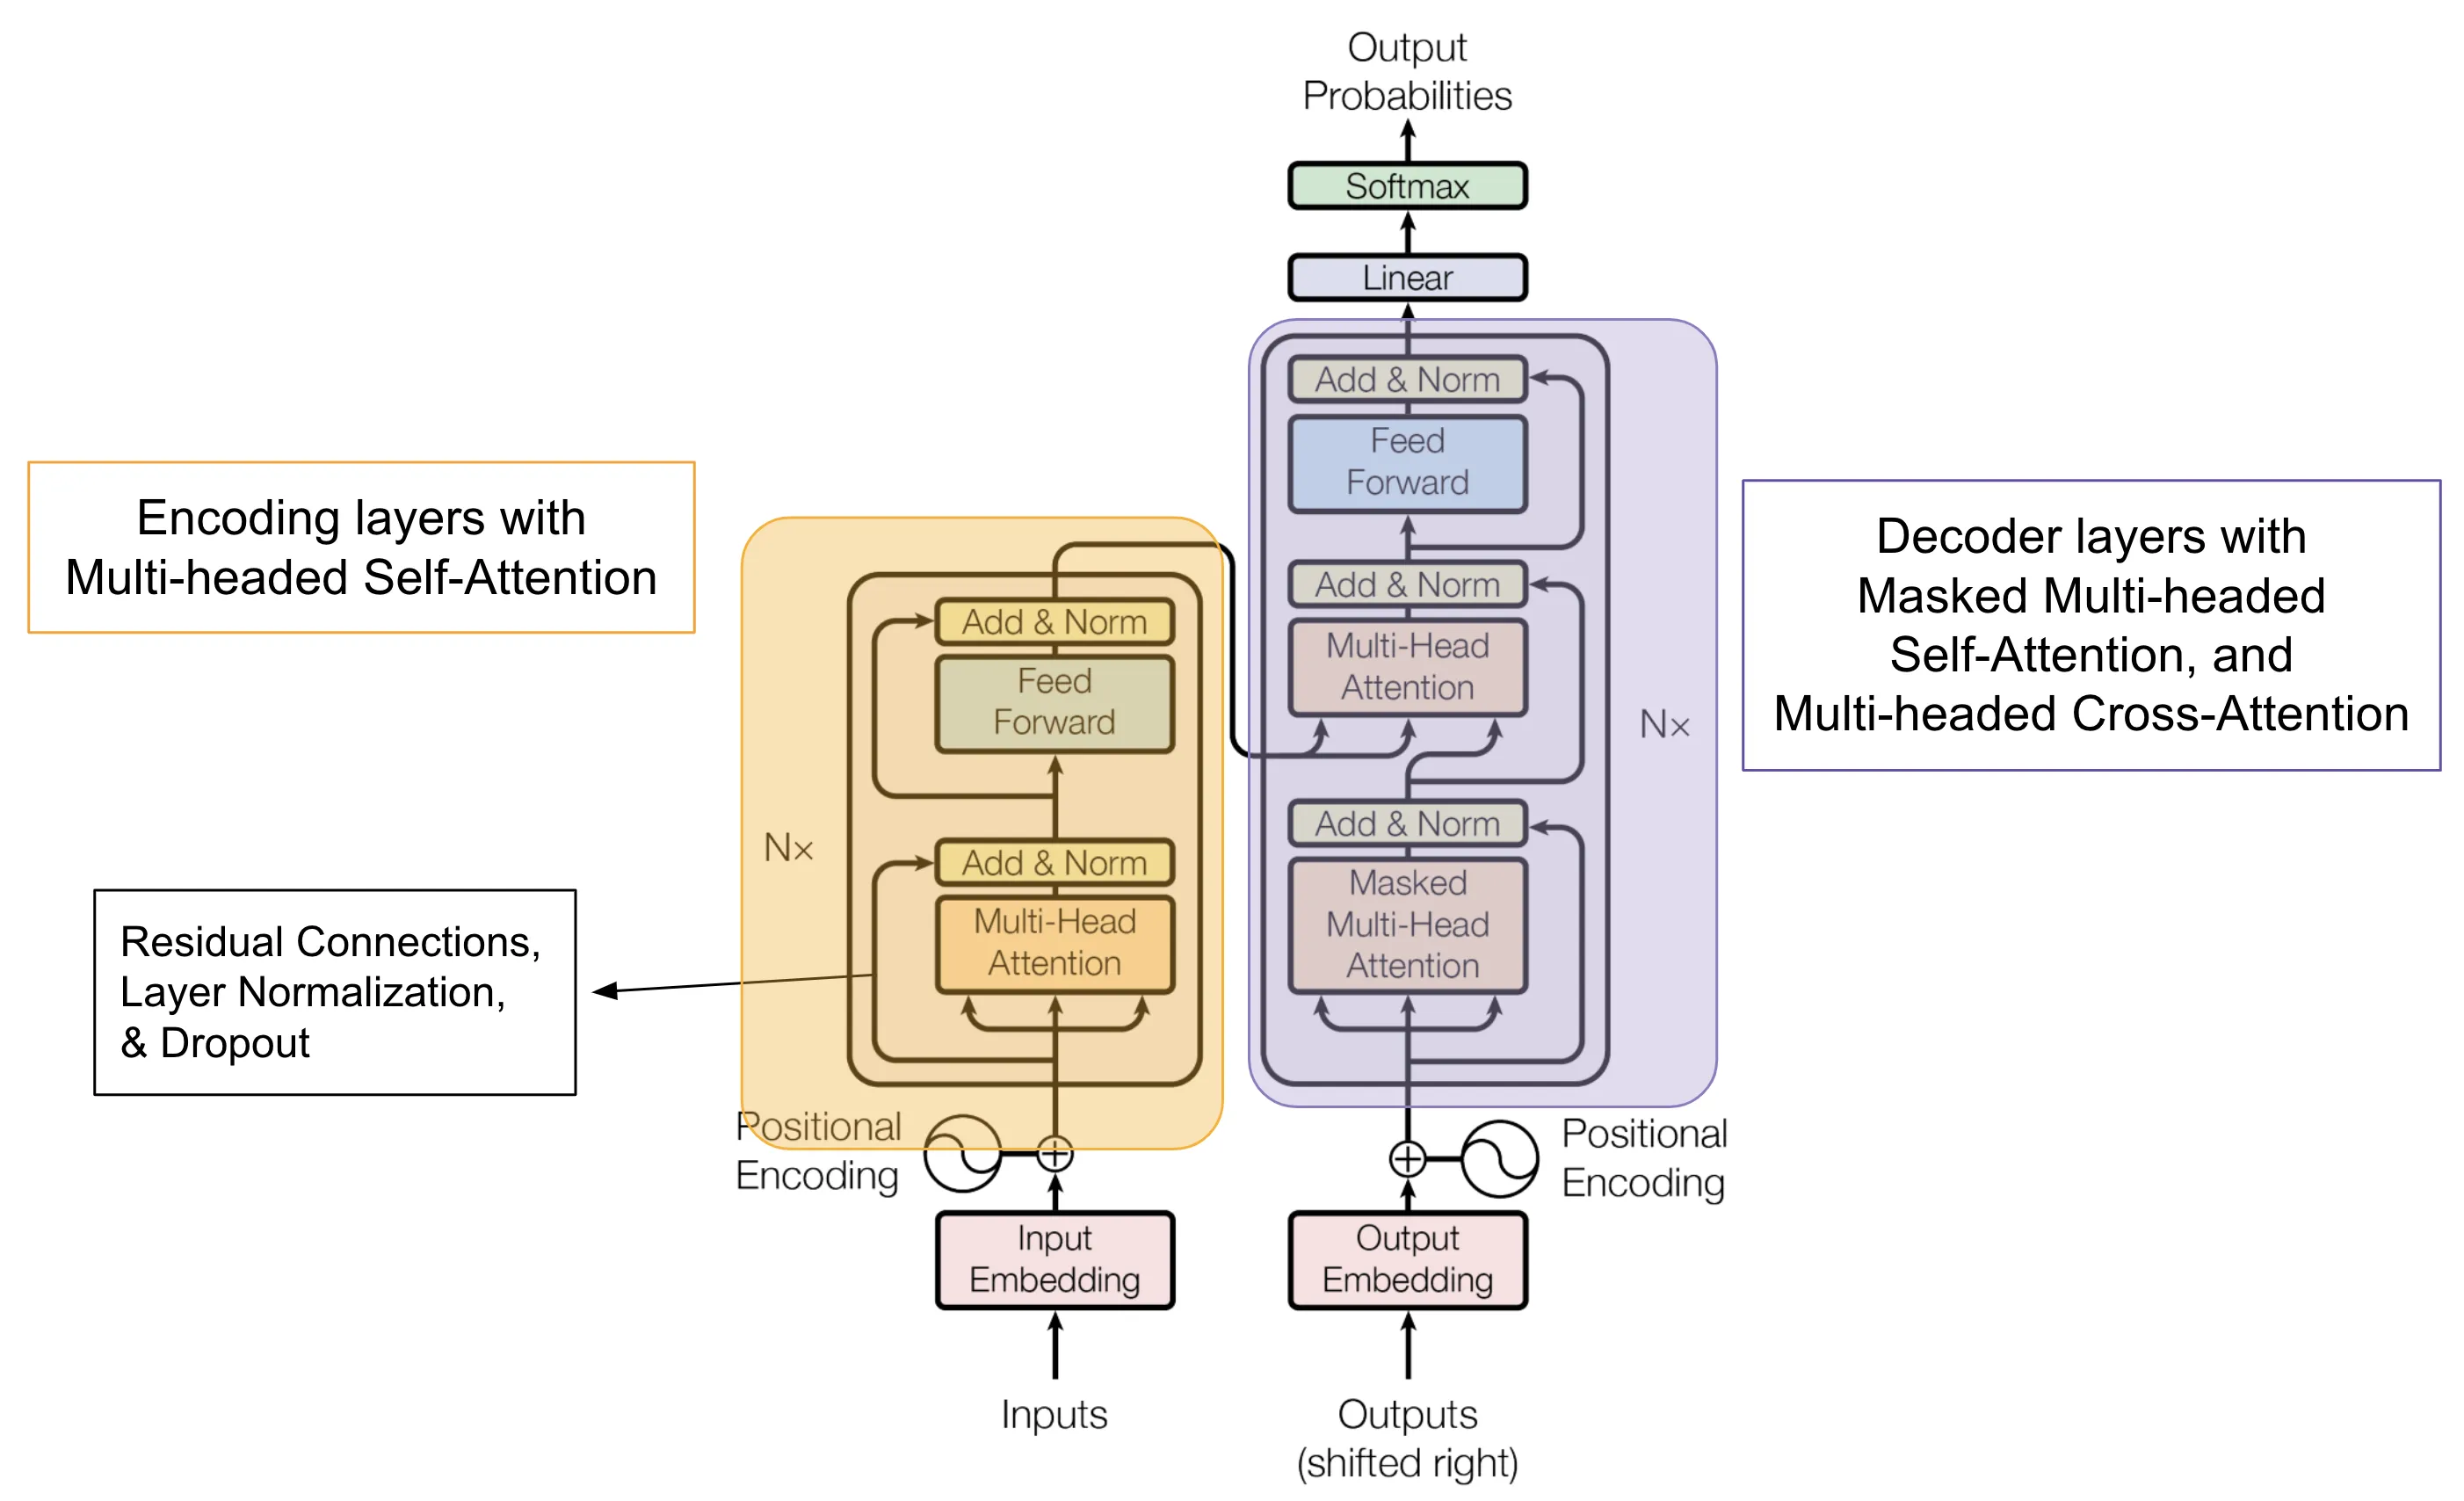

### Parameters Count in Transformer Architecture

The number of parameters in a Transformer model can be calculated based on its architecture components, particularly focusing on the encoder and decoder layers. Here’s how to determine the parameter count:

#### Key Components
1. **Embedding Layer**:
   - For both input and output embeddings, the number of parameters is given by:
     $$
     \text{Parameters}_{\text{embedding}} = \text{vocab\_size} \times \text{d}_{\text{model}}
     $$
   - Where $\text{vocab\_size}$ is the size of the vocabulary and $\text{d}_{\text{model}}$ is the dimension of the model (the size of the embeddings).

2. **Multi-Head Self-Attention**:
   - Each attention head has parameters for the query, key, and value matrices:
     $$
     \text{Parameters}_{\text{attention}} = 3 \times (\text{d}_{\text{model}} \times \frac{\text{d}_{\text{model}}}{\text{num\_heads}})
     $$
   - For $h$ heads, the total for all heads is:
     $$
     \text{Parameters}_{\text{multi-head attention}} = 3 \times h \times (\text{d}_{\text{model}}^2 / h) = 3 \times \text{d}_{\text{model}}^2
     $$

3. **Feed-Forward Network**:
   - Each layer has two linear transformations (one for input and one for output):
     $$
     \text{Parameters}_{\text{feed-forward}} = 2 \times (\text{d}_{\text{model}} \times \text{d}_{\text{ff}})
     $$
   - Where $\text{d}_{\text{ff}}$ is the dimension of the feed-forward layer.

4. **Layer Normalization**:
   - Each layer normalization has parameters for scaling and shifting:
     $$
     \text{Parameters}_{\text{layer norm}} = 2 \times \text{d}_{\text{model}}
     $$

5. **Total Parameters for One Encoder/Decoder Layer**:
   - Combining all components, we get:
     $$
     \begin{align*}
     \text{Total Parameters per layer} &= 3 \times \text{d}_{\text{model}}^2 + 2 \times (\text{d}_{\text{model}} \times \text{d}_{\text{ff}}) + 2 \times \text{d}_{\text{model}}
     \end{align*}
     $$

6. **Total Parameters for All Layers**:
   - If there are $N$ layers in both the encoder and decoder, then the total parameters are:
     $$
     \begin{align*}
     \text{Total Parameters} &= N \times (\text{Total Parameters per layer}) + 2 \times (\text{vocab\_size} \times d_{\text{model}})
     \end{align*}
     $$

### Example Calculation
Assuming a Transformer with:
- Vocabulary size ($\text{vocab\_size}$) = 30,000
- Model dimension ($\text{d}_{\text{model}}$) = 512
- Feed-forward dimension ($\text{d}_{\text{ff}}$) = 2048
- Number of heads ($h$) = 8
- Number of layers ($N$) = 6 (for both encoder and decoder)

1. **Embedding Layer**:
   $$
   30,000 \times 512 = 15,360,000
   $$

2. **Multi-Head Attention**:
   $$
   3 \times (512^2) = 786,432
   $$

3. **Feed-Forward Network**:
   $$
   2 \times (512 \times 2048) = 2,097,152
   $$

4. **Layer Normalization**:
   $$
   2 \times 512 = 1,024
   $$

5. **Total Parameters per Layer**:
   $$
   786,432 + 2,097,152 + 1,024 = 2,884,608
   $$

6. **Total for All Layers** (encoder + decoder):
   $$
   (6 + 6) \times 2,884,608 + (15,360,000) = 34,615,296 + 15,360,000 = 49,975,296
   $$

### Conclusion
The total number of parameters in a Transformer model can vary significantly based on its architecture specifics such as dimensions and number of layers. This example illustrates how to calculate these parameters systematically based on each component's contributions to the overall architecture.

---
---
---

### BERT Overview

#### Model Name
**BERT (Bidirectional Encoder Representations from Transformers)**

#### Year Introduced
- BERT was released on **October 11, 2018**.

#### Improvements Over Previous Models
- **Bidirectionality**: Unlike previous models that processed text in a unidirectional manner (left-to-right or right-to-left), BERT processes text bidirectionally, allowing it to consider the context from both directions simultaneously.
- **Contextual Understanding**: BERT improves contextual understanding by using the entire sentence as input, which helps in understanding the nuances of language better than traditional models.

#### Architecture Details
1. **Encoder-Only Architecture**:
   - BERT is based solely on the encoder part of the Transformer architecture, which allows it to handle various natural language processing tasks effectively.
   - It consists of multiple layers of transformers (typically 12 for BERT Base and 24 for BERT Large).

2. **Input Representation**:
   - BERT uses WordPiece embeddings and adds positional encodings.
   - It includes special tokens like `[CLS]` for classification tasks and `[SEP]` to separate different sentences.

3. **Self-Attention Mechanism**:
   - The self-attention mechanism allows BERT to weigh the importance of each token relative to others in the sentence, enhancing its ability to understand context.

4. **Pre-training Tasks**:
   - **Masked Language Model (MLM)**: Randomly masks some tokens in the input and trains the model to predict them based on their context.
   - **Next Sentence Prediction (NSP)**: Trains the model to understand relationships between sentences by predicting if one sentence follows another.

#### Parameters Count
- **BERT Base**: 
  - Contains **110 million parameters**.
- **BERT Large**: 
  - Contains **345 million parameters**.

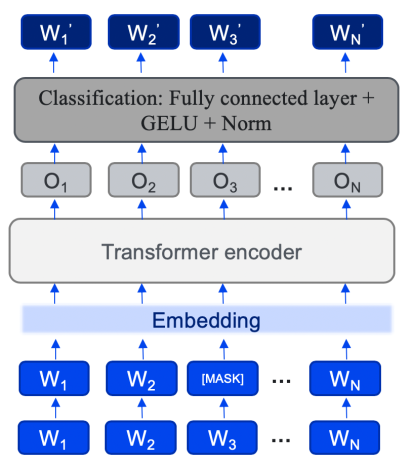

##### Parameter Calculation Path
1. **Embedding Layer**:
   - Vocabulary size ($V$) multiplied by embedding dimension ($d_{\text{model}}$):
     $$
     \text{Parameters}_{\text{embedding}} = V \times d_{\text{model}}
     $$

2. **Transformer Layers**:
   - Each transformer layer consists of:
     - Multi-Head Attention parameters:
       $$
       \text{Parameters}_{\text{attention}} = 4 \times d_{\text{model}}^2 \times h
       $$
     - Feed-Forward Network parameters:
       $$
       \text{Parameters}_{\text{feed-forward}} = 2 \times (d_{\text{model}} \times d_{\text{ff}})
       $$
     - Layer Normalization parameters:
       $$
       \text{Parameters}_{\text{layer norm}} = 2 \times d_{\text{model}}
       $$

3. **Total Parameters for One Layer**:
   Combining all components gives us:
   $$
   \text{Total Parameters per layer} = 4 \times d_{\text{model}}^2 + 2 \times (d_{\text{model}} \times d_{\text{ff}}) + 2 \times d_{\text{model}}
   $$

4. **Total Parameters for All Layers**:
   If there are $N$ layers in the model, then the total parameters are:
   $$
   \text{Total Parameters} = N \times (\text{Total Parameters per layer}) + V \times d_{\text{model}}
   $$

### Advantages
- **Versatility**: BERT can be fine-tuned for a variety of NLP tasks such as sentiment analysis, question answering, and named entity recognition.
- **State-of-the-Art Performance**: Achieved state-of-the-art results on several NLP benchmarks upon its release.

### Good for Tasks
- **Question Answering**: Understanding and generating answers based on context.
- **Sentiment Analysis**: Classifying text based on sentiment.
- **Named Entity Recognition (NER)**: Identifying entities within text.
- **Text Classification**: Classifying documents into predefined categories.

### Summary
BERT represents a significant advancement in natural language processing by leveraging bidirectional context and a robust transformer architecture. Its ability to understand language nuances has made it a foundational model for many subsequent NLP tasks and developments.

 

---
---
---

### GPT Overview

#### Model Name
**GPT (Generative Pre-trained Transformer)**

#### Year Introduced
- GPT was released in **June 2018**.

#### Improvements Over Previous Models
- **Unidirectional Training**: GPT processes text in a unidirectional manner (left-to-right), focusing on predicting the next token in a sequence, which enhances its ability to generate coherent text.
- **Transfer Learning**: GPT introduced the concept of transfer learning in NLP, allowing the model to be pre-trained on a large corpus and then fine-tuned for specific tasks.

#### Architecture Details
1. **Decoder-Only Architecture**:
   - GPT is based solely on the decoder part of the Transformer architecture, which is designed for generative tasks.
   - It consists of multiple layers of transformers (12 for GPT, 24 for GPT-2, and up to 96 for GPT-3).

2. **Input Representation**:
   - GPT uses Byte Pair Encoding (BPE) for tokenization, creating subword units to handle a wide range of vocabulary.
   - Positional encodings are added to the token embeddings to retain information about the order of tokens.

3. **Self-Attention Mechanism**:
   - The self-attention mechanism allows GPT to consider all previous tokens in the sequence when generating the next token, ensuring coherent text generation.

4. **Pre-training and Fine-tuning**:
   - **Pre-training**: The model is trained on a diverse dataset using unsupervised learning to predict the next token in a sequence.
   - **Fine-tuning**: The pre-trained model can be fine-tuned on specific tasks, leveraging its generative capabilities for various applications.

#### Parameters Count
- **GPT**: 
  - Contains **117 million parameters**.
- **GPT-2**: 
  - Contains **1.5 billion parameters**.
- **GPT-3**: 
  - Contains **175 billion parameters**.

![image.png](attachment:image.png)

##### Parameter Calculation Path
1. **Embedding Layer**:
   - Vocabulary size ($V$) multiplied by embedding dimension ($d_{\text{model}}$):
     $$
     \text{Parameters}_{\text{embedding}} = V \times d_{\text{model}}
     $$

2. **Transformer Layers**:
   - Each transformer layer consists of:
     - Multi-Head Attention parameters:
       $$
       \text{Parameters}_{\text{attention}} = 4 \times d_{\text{model}}^2 \times h
       $$
     - Feed-Forward Network parameters:
       $$
       \text{Parameters}_{\text{feed-forward}} = 2 \times (d_{\text{model}} \times d_{\text{ff}})
       $$
     - Layer Normalization parameters:
       $$
       \text{Parameters}_{\text{layer norm}} = 2 \times d_{\text{model}}
       $$

3. **Total Parameters for One Layer**:
   Combining all components gives us:
   $$
   \text{Total Parameters per layer} = 4 \times d_{\text{model}}^2 + 2 \times (d_{\text{model}} \times d_{\text{ff}}) + 2 \times d_{\text{model}}
   $$

4. **Total Parameters for All Layers**:
   If there are $N$ layers in the model, then the total parameters are:
   $$
   \text{Total Parameters} = N \times (\text{Total Parameters per layer}) + V \times d_{\text{model}}
   $$

### Advantages
- **Text Generation**: GPT excels at generating human-like text, making it suitable for creative writing and content generation.
- **Flexibility**: Can be adapted for various tasks, including summarization, translation, and dialogue systems.

### Good for Tasks
- **Text Generation**: Producing coherent and contextually relevant text.
- **Conversational Agents**: Powering chatbots and virtual assistants.
- **Summarization**: Condensing longer texts into shorter summaries.
- **Creative Writing**: Assisting in writing stories, poems, and other creative content.

### Summary
GPT represents a significant advancement in natural language generation, utilizing a unidirectional architecture to generate coherent and contextually appropriate text. Its ability to learn from large datasets and adapt to various tasks has made it a foundational model in the field of natural language processing and generation.

### GPT Model Evolution Overview

#### 1. GPT-1
- **Year Introduced**: 2018
- **Parameters**: **117 million**
- **Architecture**: 
  - Based on the Transformer architecture with **12 decoder layers**.
  - Each layer has **12 attention heads**.
  - Embedding dimension of **768**.
  - Context window size of **512 tokens**.
- **Key Contributions**:
  - Introduced the concept of pre-training on a large corpus followed by fine-tuning for specific tasks.
  - Demonstrated zero-shot performance on various NLP tasks, showcasing the effectiveness of generative language modeling.

#### 2. GPT-2
- **Year Introduced**: 2019
- **Parameters**: **1.5 billion**
- **Architecture**:
  - Expanded to **48 decoder layers**.
  - Increased embedding dimension to **1600**.
  - Context window size of **1024 tokens**.
- **Key Contributions**:
  - Showcased remarkable text generation capabilities, producing coherent and contextually relevant text.
  - Raised ethical concerns regarding potential misuse, leading to a phased release of the model.

#### 3. GPT-3
- **Year Introduced**: 2020
- **Parameters**: **175 billion**
- **Architecture**:
  - Consists of **96 decoder layers**.
  - Embedding dimension increased to **12,288**.
  - Context window size of **2048 tokens**.
- **Key Contributions**:
  - Introduced few-shot learning, allowing the model to perform tasks with minimal examples.
  - Demonstrated versatility across various applications, including translation, question answering, and creative writing.

### Comparison Table

| Feature                   | GPT-1               | GPT-2               | GPT-3               |
|---------------------------|---------------------|---------------------|---------------------|
| Parameters                 | 117 million         | 1.5 billion         | 175 billion         |
| Decoder Layers             | 12                  | 48                  | 96                  |
| Context Token Size         | 512                 | 1024                | 2048                |
| Hidden Layer Dimension      | 768                 | 1600                | 12,288              |
| Training Dataset           | BookCorpus (3-5 GB) | Diverse internet text| Even larger diverse dataset |

### Summary
The evolution from GPT-1 to GPT-3 illustrates significant advancements in natural language processing capabilities. Each iteration has increased in size and complexity, allowing for improved performance across a wide range of tasks while raising important ethical considerations regarding their use.


---
---
---

# now

### Equation Representation
$$
\text{RAG} = \text{Neo4j}(\text{Knowledge Graphs} + \text{Ontology})
$$

### Explanation
- **RAG (Retrieval-Augmented Generation)**: Represents the overall framework that enhances generative models by integrating structured knowledge.
- **Neo4j**: Refers to a graph database management system that can efficiently store and query knowledge graphs and ontologies.
- **Knowledge Graphs**: Structured representations of knowledge where entities are nodes and their relationships are edges.
- **Ontology**: A formal representation of concepts within a domain, including the relationships between those concepts.

### Summary
This equation captures the essence of RAG as a synthesis of knowledge graphs and ontologies, facilitated by a robust graph database like Neo4j. This combination allows RAG to retrieve structured, relevant information that enhances the generative capabilities of NLP models.